# Heart Disease Exploration

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#assess">Assessment</a></li>
<li><a href="#uni">1D / Univariate Exploration</a></li>
<li><a href="#bi">2D / Bivariate Exploration</a></li>
<li><a href="#multi">3D / Multivariate Exploration</a></li>
<li><a href="#pred">Predictions</a></li>
<li><a href="#visual">Questions & Visualizations</a></li>
</ul>

<a id='intro'></a>
## Introduction
This notebook will explore the [Kaggle Heart Disease dataset](https://www.kaggle.com/ronitf/heart-disease-uci/version/1). It provides information about patient characteristics to explore with the presence of heart disease. 

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
%matplotlib inline

Let's explore the dataset.

In [2]:
df = pd.read_csv('heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [3]:
df.shape

(303, 14)

The dataset has 303 rows and 14 columns. In reviewing the Kaggle information, the columns refer to the following:

- **age**: The age of the patient
- **sex**: The patient's sex (Male: 1, Female: 0)
- **cp**: Chest pain with four values ranging from 0 to 3 (meaning unclear)
- **trestbps**: The patient's resting systolic blood pressure
- **chol**: Serum cholesterol in mg/dl
- **fbs**: Fasting blood sugar, whether it is greater than 120 mg/dl (1: True, 0: False)
- **restecg**: Resting electrocardiographic results (ECG) with values of 0, 1, 2 (meaning unclear)
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise induced angina (1: True, 0: False)
- **oldpeak**: ST depression induced by exercise relative to rest (considered potential sign of heart disease)
- **slope**: Slope of the peak exercise ST segment
- **ca**: Number of major vessels (0 to 3) colored by flouroscopy (I believe this indicates blockage)
- **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
- **target**: Refers to the presence of heart disease with 0 being no heart disease and 1 being having heart disease 

There's a few more columns that I want to explore a bit further to better understand them, especially `thal`, `oldpeak` and `slope`.

<a id='assess'></a>
## Assessment

Let's review the data ranges and counts for the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


There are no missing values identified at this time.

In [5]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [6]:
df.duplicated().sum()

1

There is one duplicated value. Let's inspect it.

In [7]:
df[df.duplicated()]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1

It seems very unlikely that two patients would have exactly the same values for all of these measures which suggests that this is a duplicate. Let's drop it.

In [8]:
df.drop_duplicates(inplace=True)

Let's also convert all of the column names to more understandable names.

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
df.columns = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
              'exercise_angina', 'oldpeak', 'slope', 'fluroscopy_vessels', 
              'thal', 'heart_disease']

Because the values of `thal` are not what were expected, let's drop this column because it is difficult to interpret.

In [11]:
df.drop('thal', axis=1, inplace=True)

Let's convert the non-boolean, categorical variables to strings.

In [12]:
string_col = ['chest_pain', 'resting_ecg', 'slope']
df.loc[:, string_col] = df[string_col].astype(str)

In [13]:
# Use info to check the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 13 columns):
age                       302 non-null int64
sex                       302 non-null int64
chest_pain                302 non-null object
resting_blood_pressure    302 non-null int64
cholesterol               302 non-null int64
fasting_blood_sugar       302 non-null int64
resting_ecg               302 non-null object
max_heart_rate            302 non-null int64
exercise_angina           302 non-null int64
oldpeak                   302 non-null float64
slope                     302 non-null object
fluroscopy_vessels        302 non-null int64
heart_disease             302 non-null int64
dtypes: float64(1), int64(9), object(3)
memory usage: 33.0+ KB


<a id='uni'></a>
## 1D / Univariate Exploration
### Categorical Variables

Let's check the counts for the categorical variables.

In [14]:
categorical = ['sex', 'chest_pain', 'fasting_blood_sugar', 'resting_ecg', 
               'exercise_angina', 'heart_disease', 'slope', 'fluroscopy_vessels']
for col in categorical:
    print(col)
    print(df[col].value_counts(), '\n')

sex
1    206
0     96
Name: sex, dtype: int64 

chest_pain
0    143
2     86
1     50
3     23
Name: chest_pain, dtype: int64 

fasting_blood_sugar
0    257
1     45
Name: fasting_blood_sugar, dtype: int64 

resting_ecg
1    151
0    147
2      4
Name: resting_ecg, dtype: int64 

exercise_angina
0    203
1     99
Name: exercise_angina, dtype: int64 

heart_disease
1    164
0    138
Name: heart_disease, dtype: int64 

slope
2    141
1    140
0     21
Name: slope, dtype: int64 

fluroscopy_vessels
0    175
1     65
2     38
3     20
4      4
Name: fluroscopy_vessels, dtype: int64 



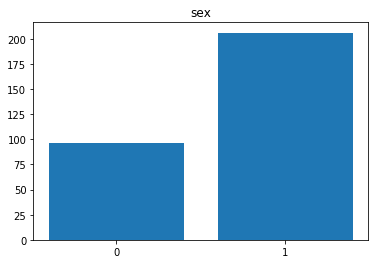

1    206
0     96
Name: sex, dtype: int64


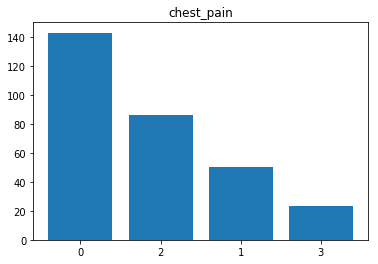

0    143
2     86
1     50
3     23
Name: chest_pain, dtype: int64


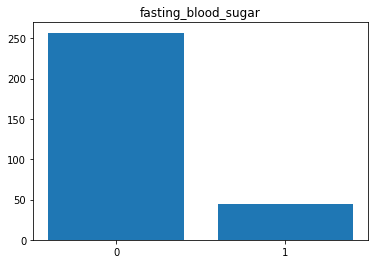

0    257
1     45
Name: fasting_blood_sugar, dtype: int64


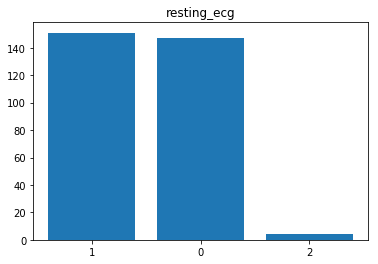

1    151
0    147
2      4
Name: resting_ecg, dtype: int64


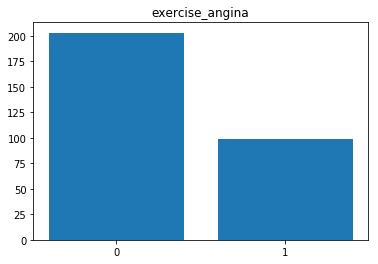

0    203
1     99
Name: exercise_angina, dtype: int64


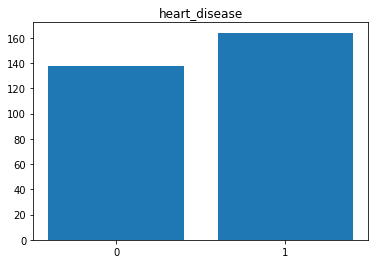

1    164
0    138
Name: heart_disease, dtype: int64


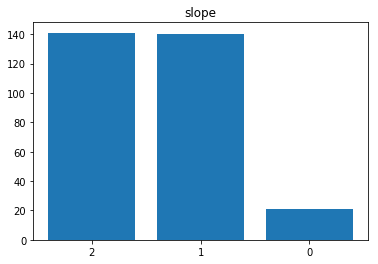

2    141
1    140
0     21
Name: slope, dtype: int64


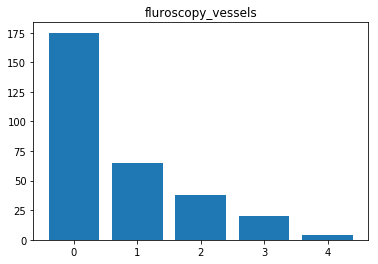

0    175
1     65
2     38
3     20
4      4
Name: fluroscopy_vessels, dtype: int64


In [15]:
for col in categorical:
    counts = df[col].value_counts()
    positions = counts.index
    plt.bar(positions, counts.values, tick_label=positions)
    plt.title(col)
    plt.show();
    print(counts)

### Findings

**Age**

The age range of participants is from 29 to 77, with 50% being over the age of 55 (which is definitely older than the general population spread). I wonder what the age of the youngest person with heart disease is.

**Sex**

Having a look at some of the avaible information, men are represented by 1 and women are represented by 0 because they are [more likely to experience a heart attack](https://www.health.harvard.edu/heart-health/throughout-life-heart-attacks-are-twice-as-common-in-men-than-women) and so it seems logical that they may have greater representation in the study. There is quite an imbalance between the number of men and women.

**Chest Pain**

Category 0 is the most common chest pain category.

**Resting Blood Pressure**

The resting blood pressure has quite a large range from 90s to 200, with a mean of 130. Which [indicates an increased risk](https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/blood-pressure/art-20050982) of heart diease.

**Serum Cholesterol**

Again, there was quite a range for the serum cholestrol from 126 to 564. It is [desirable to have a total cholesterol level below 200 mg/dl](https://www.mayoclinic.org/tests-procedures/cholesterol-test/about/pac-20384601).

**Fasting Blood Sugar**

The majority of participants having a fasting blood sugar over 120mg/dl.

**Blood Vessel Fluoroscopy**

The split between patients with no vessels lighting up and those with is approximately 50/50 with a range in the number of vessels that light up.

**Exercise-Induced Angina**

Approximately 1/3 of participants have exercise-induced angina.

**Old Peak ST**

Values here range from 0 to 6.20 with a median of 0.8, which suggests a right-skewed distribution.

**Slope**

Slope actually looks like it isn't continuous and is instead categorical.

**thal**

The values here don't seem to match what was given by in the Kaggle explanation. As a result, I may drop this.

**Target**

The split between those who have heart disease and those who don't is relatively balanced.

### Numerical Variables

In [16]:
numerical = [col for col in df.columns if col not in categorical]

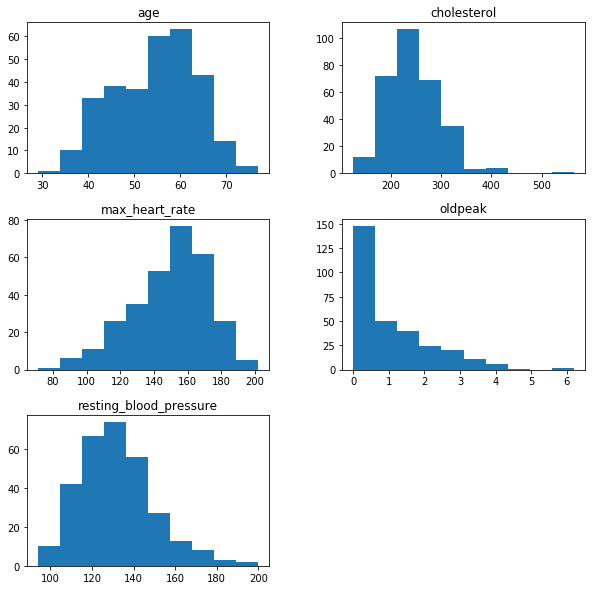

In [17]:
df[numerical].hist(figsize=(10, 10), grid=False);

### Findings

**Age**

As was previously identified, there are more people over 55 than under, leading to a slight left-skew of the data, but otherwise the data is reasonably normally distributed.

**Cholesterol**

Cholesterol has a long tail to the right which suggests that it might be necessary to complete a log transformation when analyzing this data.

**Old Peak**

The majority of values appear to be less than 1 and this data is strongly skewed to the right.

**Maximum Heart Rate Achieved**

This is relatively normal with a skew to the left, with most people in a range of 140 to 170.

**Resting Blood Pressure**

The majority have a resting systolic blood pressure under 140, with the data skewed slightly to the right.

Let's just check the skew for these values.

In [18]:
df[numerical].skew()

age                      -0.203743
resting_blood_pressure    0.716541
cholesterol               1.147332
max_heart_rate           -0.532671
oldpeak                   1.266173
dtype: float64

If strong skew is +/- around 2, none of these are exceptionally skewed, therefore there may not be the need for log transformation.

<a id='bi'></a>
## 2D  / Bivariate Exploration

### Numerical
Let's explore the relationship between the numerical values and heart disease.

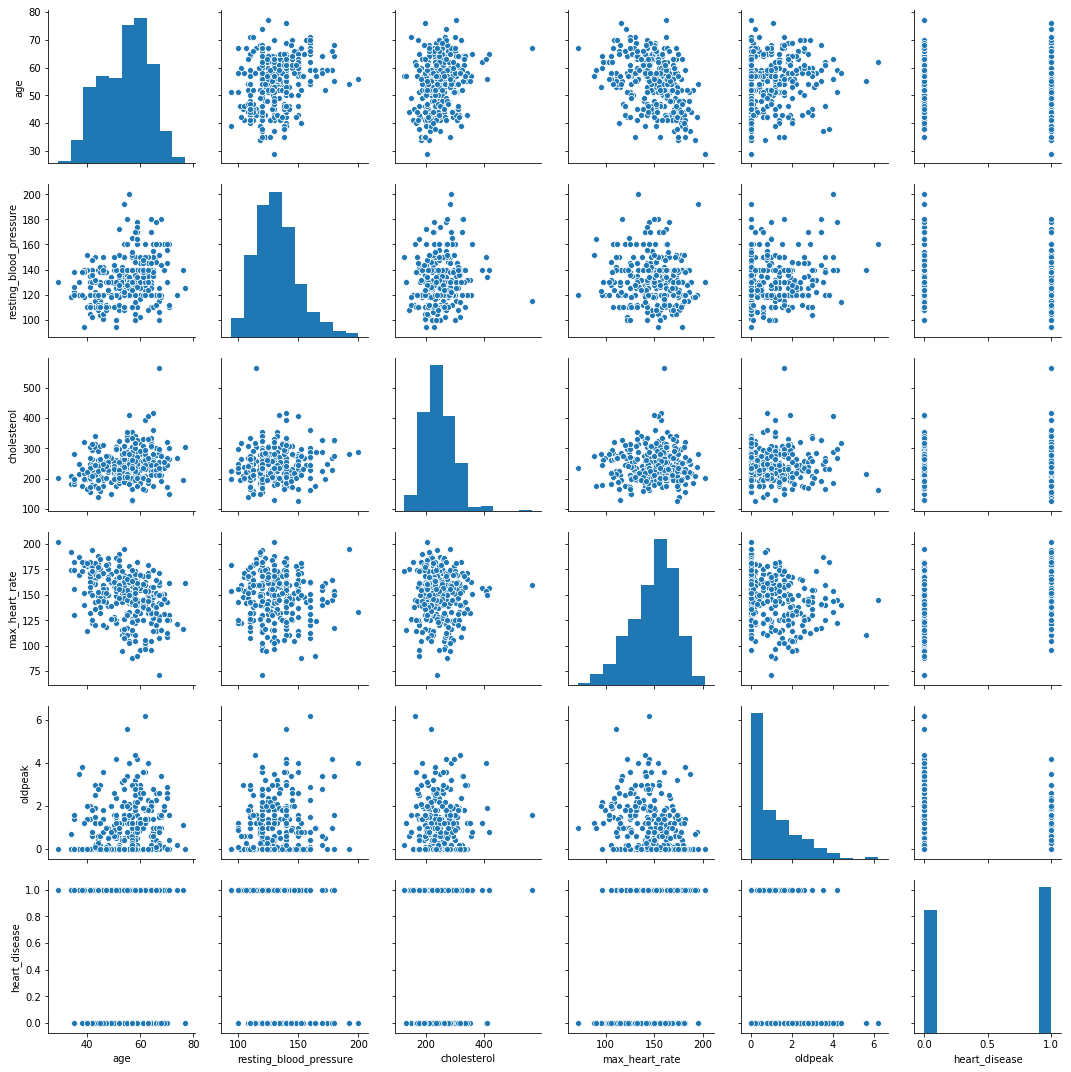

In [18]:
sns.pairplot(df[numerical + ['heart_disease']]);

In [19]:
df[numerical + ['heart_disease']].corr()

age  resting_blood_pressure  cholesterol  \
age                     1.000000                0.283121     0.207216   
resting_blood_pressure  0.283121                1.000000     0.125256   
cholesterol             0.207216                0.125256     1.000000   
max_heart_rate         -0.395235               -0.048023    -0.005308   
oldpeak                 0.206040                0.194600     0.050086   
heart_disease          -0.221476               -0.146269    -0.081437   

                        max_heart_rate   oldpeak  heart_disease  
age                          -0.395235  0.206040      -0.221476  
resting_blood_pressure       -0.048023  0.194600      -0.146269  
cholesterol                  -0.005308  0.050086      -0.081437  
max_heart_rate                1.000000 -0.342201       0.419955  
oldpeak                      -0.342201  1.000000      -0.429146  
heart_disease                 0.419955 -0.429146       1.000000

### Categorical

Let's also explore the categorical variables.

In [45]:
def count_plots(df, col):
    # Get counts
    has_hd = df[col][df.heart_disease == 1].value_counts().sort_index()
    has_nohd = df[col][df.heart_disease == 0].value_counts().sort_index()
    
    # Get plot positions from number of unique values
    positions = np.arange(0, len(df[col].unique()))
    
    plt.figure(figsize=(8, 6))
    plt.bar(positions + 0.35, has_nohd, width=0.3, label='No Heart Disease')
    plt.bar(positions, has_hd, width=0.3, label='Heart Disease')
    plt.xticks(positions + 0.35/2, has_hd.index) 
    plt.legend()
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show();

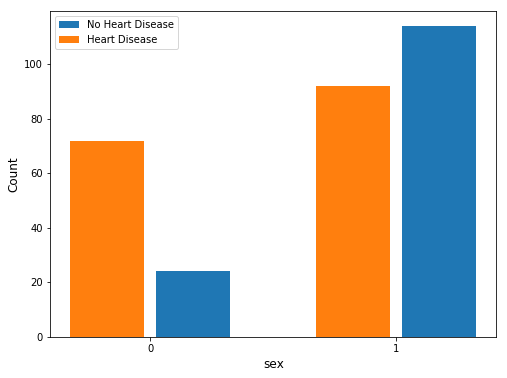

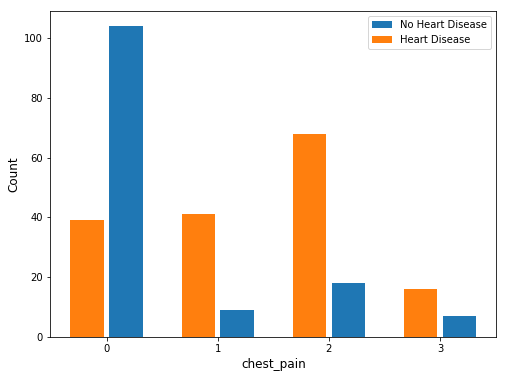

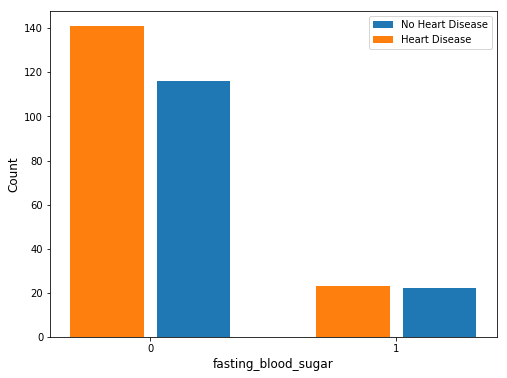

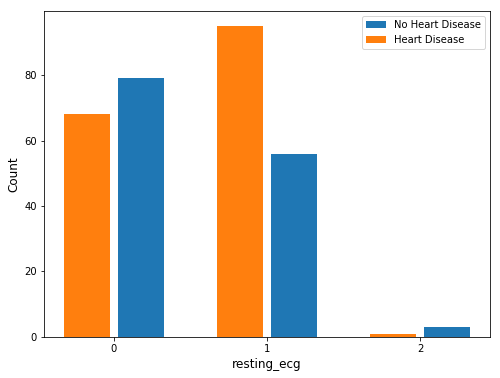

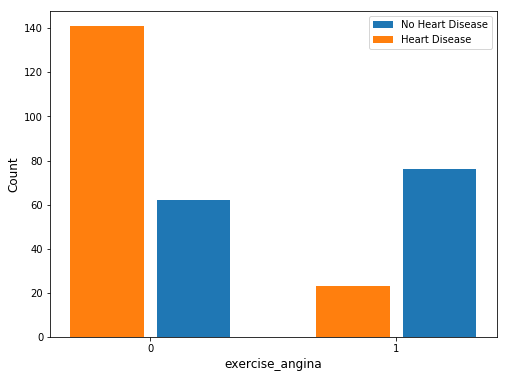

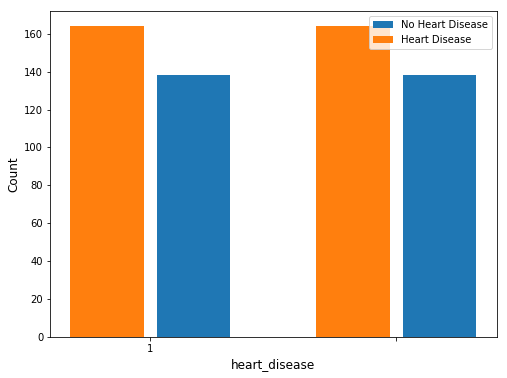

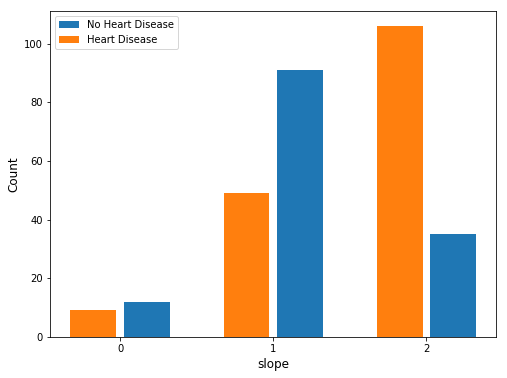

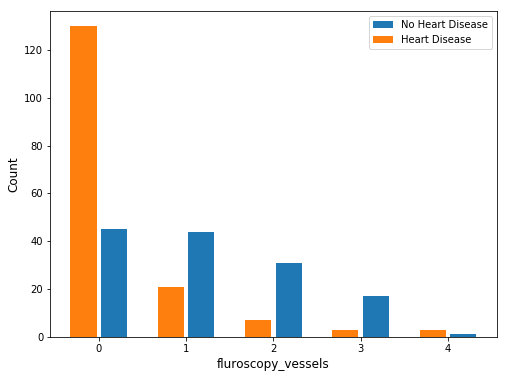

In [21]:
for col in categorical:
    count_plots(df, col)

### Findings

For the numerical variables, there seems to be stronger relationships between the maximum heart rate achieved and whether a patient has heart disease (the higher the number, the lower the hearth disease) and the old peak characteristics (the higher the number, the higher the heart disease). There are no other clear relationships identified between the numberical variables at this stage.

For the categorical variables, based on this dataset, more women (proportionally) had heart disease than men. However, I think that this may be due to an effort to match participants for sex (and age, as can be seen below). As a result, it may not be a helpful predictor, based on these results.

The levels of chest pain seem to differentiate heart disease with participants with level 0 less likely to have heart disease and participants at the other levels more likely to have heart disease, especially for levels 1 and 2.

A resting ecg at level 1 does distinguish between participants some: those at level 1 are more likely to have heart disease. 

The order of exercise induced angina seems strange with those without exercise induced angina more likely to have heart disease and those without it, less likely to have heart disease.

For slope, those with levels 1 and 2 can be distinguished as less likely to have heart disease and more likely to have heart disease, respectively.

<a id='multi'></a>
## 3D / Multivariate Exploration

### Numerical

C:\Users\rebecca-barnes\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rebecca-barnes\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


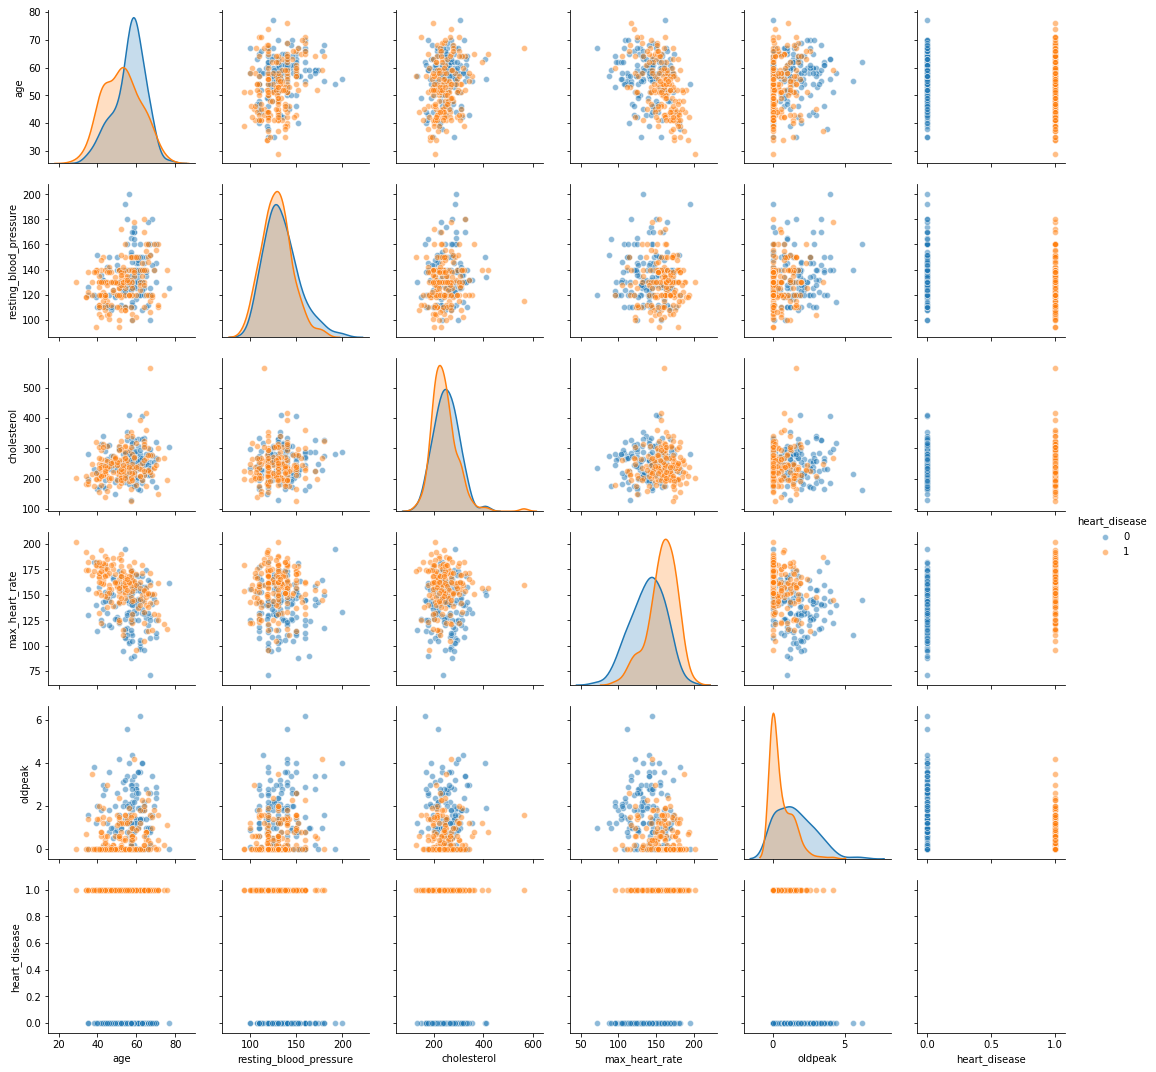

In [22]:
sns.pairplot(df[numerical + ['heart_disease']], 
             hue='heart_disease', 
             plot_kws={'alpha': 0.5});

In this plot we can see the combination of the relationships between having heart disease or not, and differences in the maximum heart rate and the old peak measurement. 

We can also see that the spread of data in old peak is far more right skewed than for those who do have heart disease than for those who don't. 

### Feature Engineering

We could make a feature of high maximum heart rate and low old peak ratings and compare the counts of people with these characteristics or not.

In [23]:
# Create the boolean condition
condition = (df.oldpeak < df.oldpeak.median()) & (df.max_heart_rate > df.max_heart_rate.median())
condition[:10]

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7     True
8     True
9    False
dtype: bool

In [24]:
df['low_oldpeak_high_max_hr'] = condition

Let's check whether there is a relationship between this condition and heart disease in terms of correlation.

In [25]:
df[['low_oldpeak_high_max_hr', 'heart_disease']].corr()

low_oldpeak_high_max_hr  heart_disease
low_oldpeak_high_max_hr                 1.000000       0.334683
heart_disease                           0.334683       1.000000

There is somewhat of a correlation between these two. Let's have a look at the counts.

In [26]:
# Counts for people in the condition
in_condition_count = df[df.low_oldpeak_high_max_hr]['heart_disease'].value_counts()
in_condition_count

1    78
0    22
Name: heart_disease, dtype: int64

More people in the condition have heart disease than people who don't. 

In [27]:
# Counts for people not in the condition
notin_condition_count = df[~df.low_oldpeak_high_max_hr]['heart_disease'].value_counts()
notin_condition_count

0    116
1     86
Name: heart_disease, dtype: int64

The number of people that don't have heart disease and are not in the condition is higher than those that do have heart disease.


Let's visualize that:

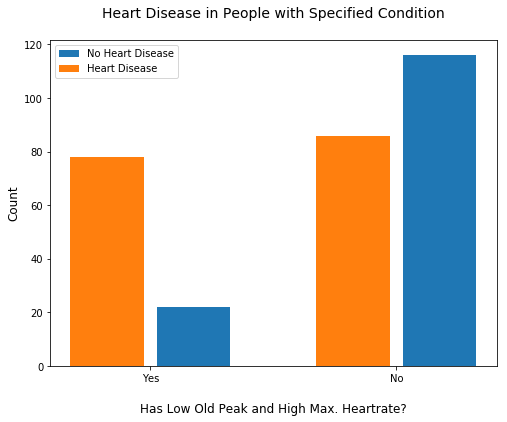

In [28]:
positions = np.arange(0, 2)
plt.figure(figsize=(8, 6))
plt.bar(positions + 0.35, [in_condition_count[0], notin_condition_count[0]], width=0.3, label='No Heart Disease')
plt.bar(positions, [in_condition_count[1], notin_condition_count[1]], width=0.3, label='Heart Disease')
plt.xticks(positions + 0.35/2, ['Yes', 'No'])
plt.legend()
plt.xlabel('\nHas Low Old Peak and High Max. Heartrate?', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Heart Disease in People with Specified Condition\n', fontsize=14);

<a id='pred'></a>
## Predictions

It is possible to use the relationship between heart disease, maximum heart rate, and old peak for a very simple predictive algorithm for heart disease. If we draw a vertical line through the angle that best separates those who have heart disease and not, we can predict that those above the line have heart disease and those below the line don't. 

Let's do a scatterplot just of those features.

In [29]:
x1, x2, y1, y2 = 0, 5, 95, 186

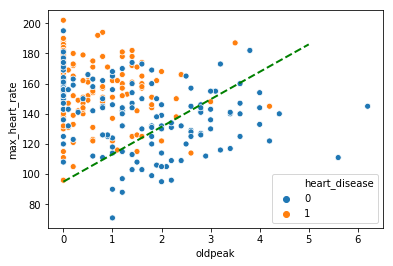

In [30]:
sns.scatterplot(x='oldpeak', y='max_heart_rate', data=df, hue='heart_disease')
plt.plot([x1, x2], [y1, y2], 'g--', linewidth=2);

The formula for this line (if $y = mx + c$) is:

In [31]:
m = (y2 - y1)/(x2 - x1)
print(m)
c = y1

18.2


$y = 15x + 95$

In [32]:
df['prediction'] = (df['oldpeak']*m + c) < df['max_heart_rate']

In [33]:
(df['prediction'] == df['heart_disease']).mean()

0.6986754966887417

While not perfect, even with this small amount of predictive capability, we have a decent amount accuracy (almost 70%) at predicting whether someone will have heart disease. Although we are best at making sure that if we say that they don't have heart disease, that this is actually true. We can see this with a confusion matrix.

In [34]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# #sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 52  86]
 [  5 159]]


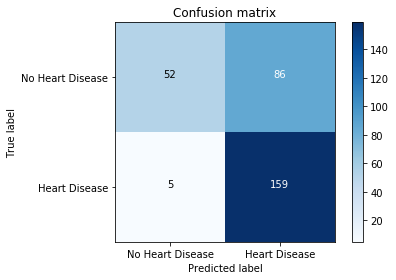

In [35]:
cm = confusion_matrix(df['heart_disease'], df['prediction'])
plot_confusion_matrix(cm, classes=["No Heart Disease", "Heart Disease"])

In [36]:
roc_auc_score(df.heart_disease, df.prediction)

0.6731618946624249

In [37]:
f1_score(df.heart_disease, df.prediction)

0.7775061124694377

Note, one issue with this methodology is that no train/test sets were made.

### Bayesian Implications

According to [Johns Hopkins](https://www.hopkinsmedicine.org/healthlibrary/conditions/cardiovascular_diseases/cardiovascular_disease_statistics_85,p00243), "An estimated 15 million U.S. adults have coronary heart disease." In 2017 there were approximately 243.5 million adults in the US ([Reference](https://www.google.com/publicdata/explore?ds=kf7tgg1uo9ude_&met_y=population&hl=en&dl=en)). 

This works out to a probability of:

In [38]:
p_hd = 15/243.5
p_hd

0.061601642710472276

Based on the test above, if you have heart disease, the probability of the test predicting that you do have heart disease is:

In [39]:
p_true_hd = 159/(5 + 159)
p_true_hd

0.9695121951219512

Or:

$P(True | HD ) = 0.9695$

We know the probability of having hearth disease in the US, so now we just need to work out the probability of getting a true test. We can get a true test if we have heart disease and the test comes out true, and we can get a true result of we don't have heart disease and the test comes out true. 

The probability of the test being false if you don't have heart disease is:

In [40]:
p_false_nohd = 52/(52 + 86)
p_false_nohd

0.37681159420289856

Or: 

$P(False|~HD) = 0.3768$

Now we can calculate the probability of getting a positive test.

In [41]:
# Probability of true with hd
p_true_and_hd = p_true_hd * p_hd

# Probability of true without hd
p_true_and_nohd = (1 - p_hd) * (1 - p_false_nohd)

p_true = p_true_and_hd + p_true_and_nohd
p_true_and_hd, p_true_and_nohd, p_true

(0.05972354384734812, 0.5847989762818796, 0.6445225201292277)

Or:

$P(True) = 0.6445$

Now we can calculate the probability of having heart disease based on this test.

In [42]:
p_hd_true = p_true_hd * p_hd / p_true
p_hd_true

0.0926632382610517

Even though this does have a degree of predictability, it is still not a great test. If you have a true test result, the chances of you having heart disease increase from 6.16% to 9.27%. 

In [43]:
p_hd_true/p_hd

1.5042332344377394

This is only a 1.5x increase. To increase the power of our test, we would need to find more ways to distinguish between people who have heart disease and don't that fall above our threshold line.

### Finding other Predictors

To find other predictors we could subset our data to only those that were predicted to have heart disease.

In [44]:
predicted_hd = df[df.prediction].copy()
assert predicted_hd.prediction.sum() == predicted_hd.shape[0]

Some potential predictors that could help distinguish would be how the categorical variables help predict heart disease.

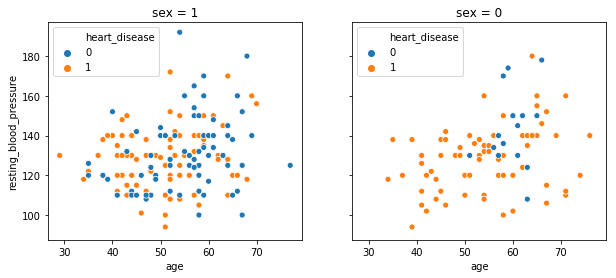

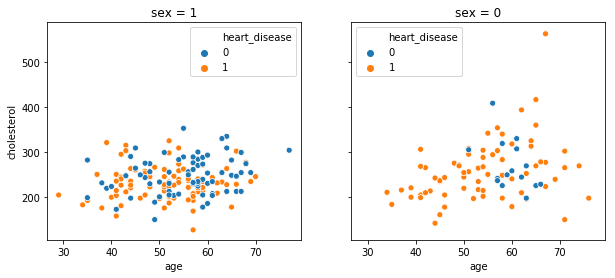

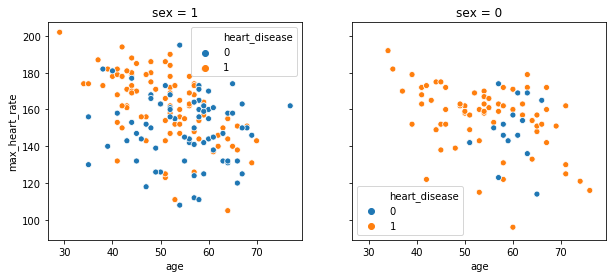

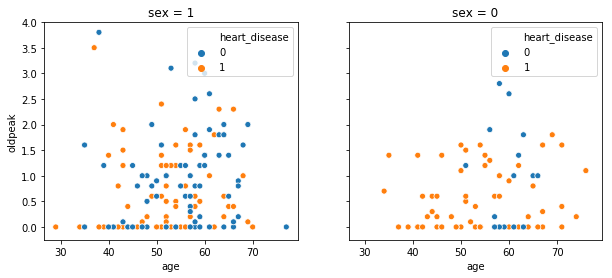

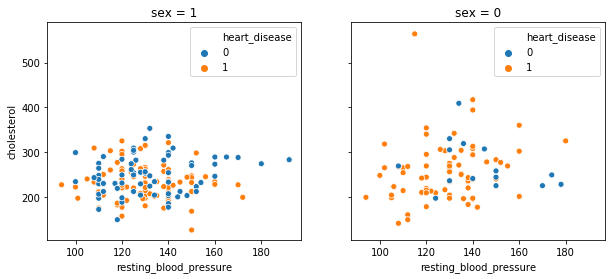

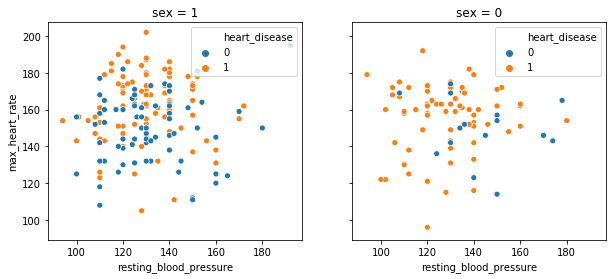

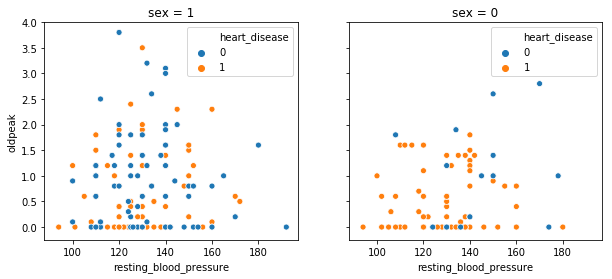

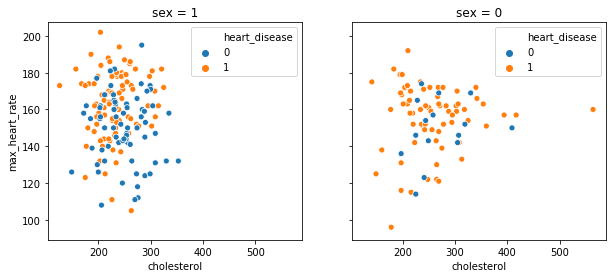

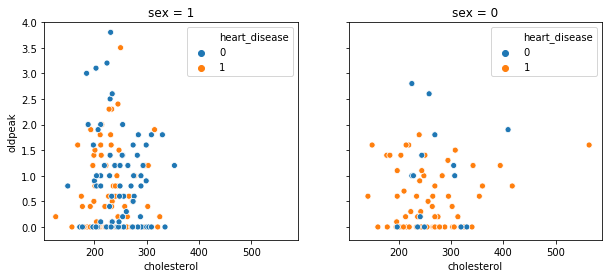

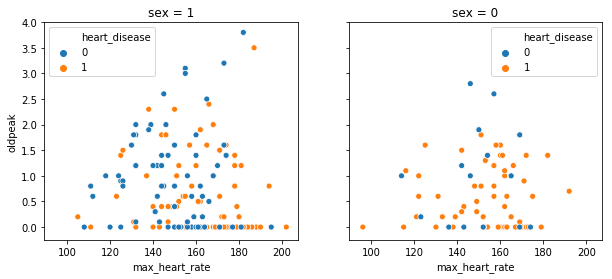

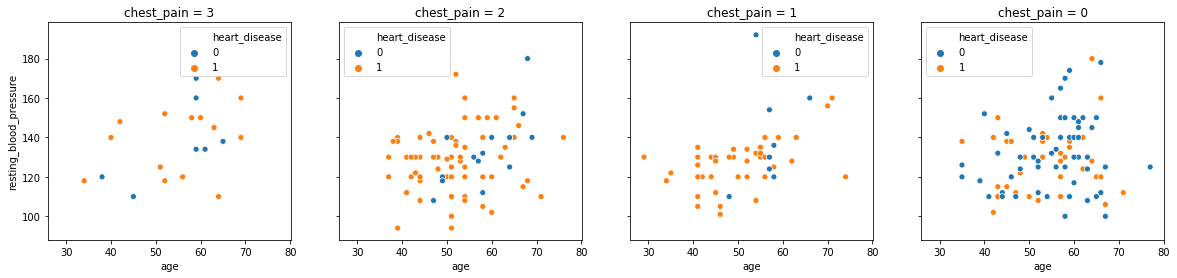

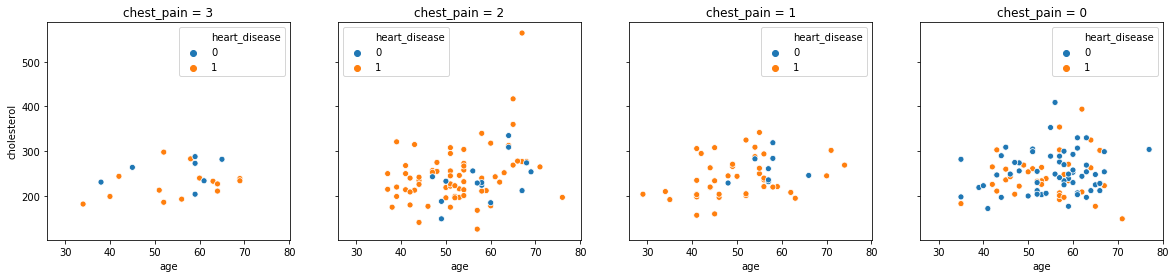

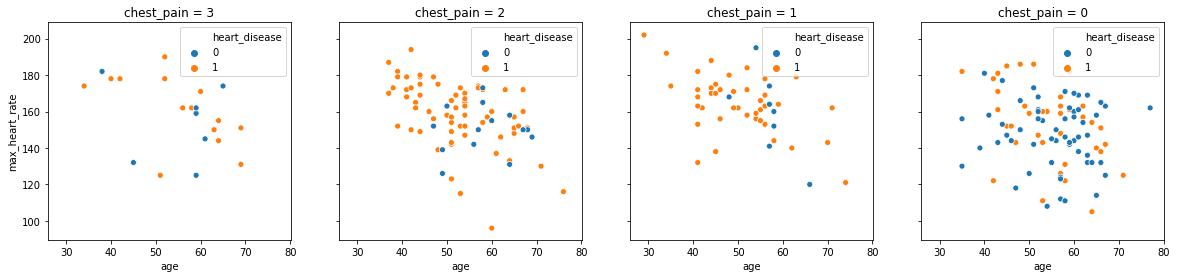

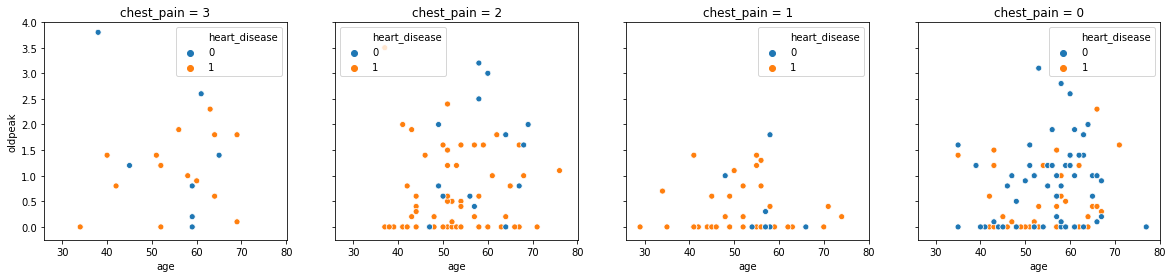

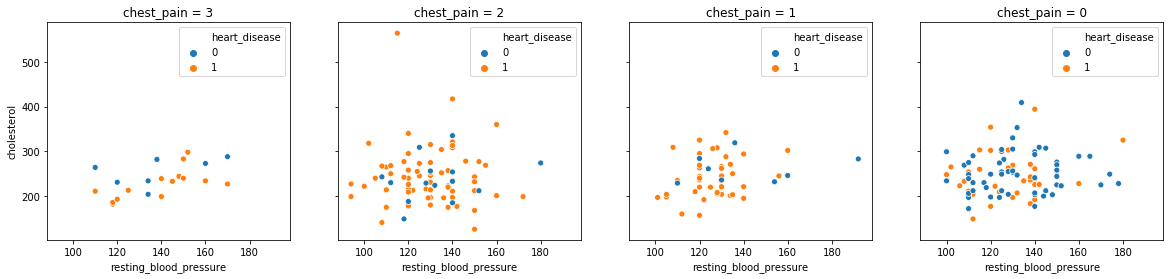

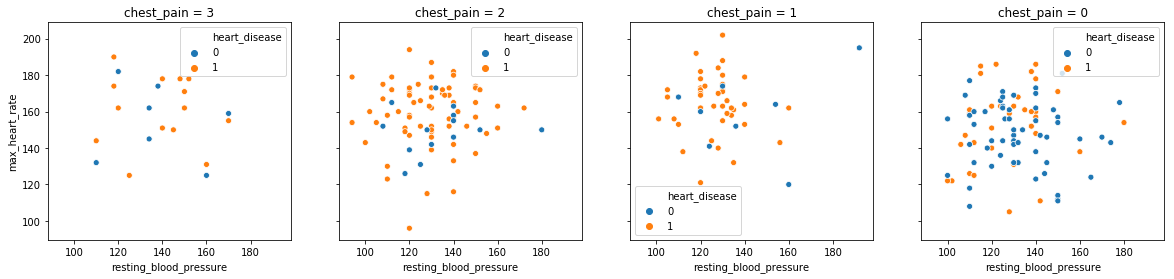

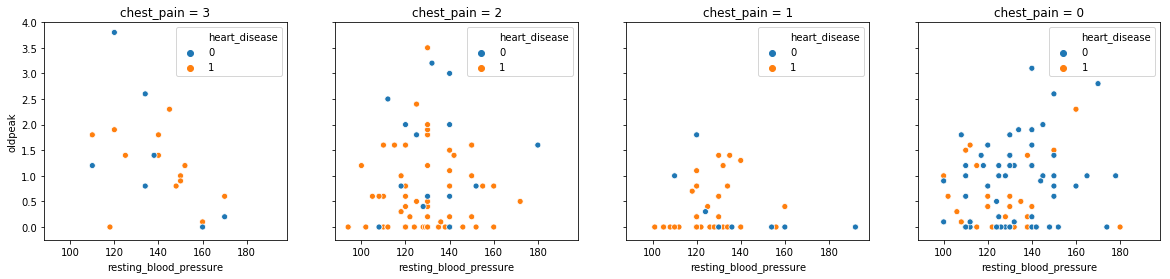

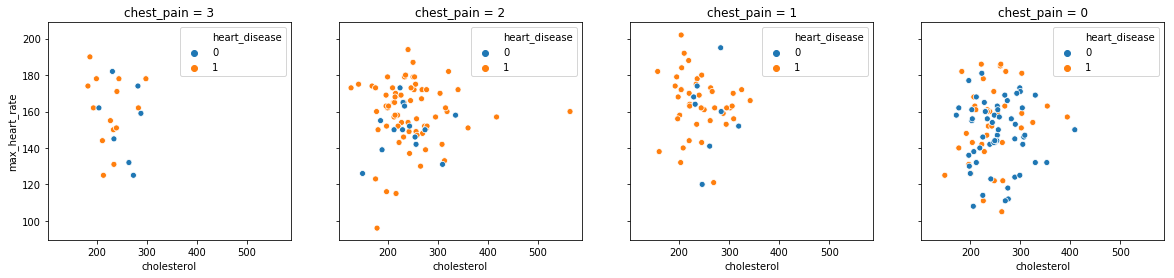

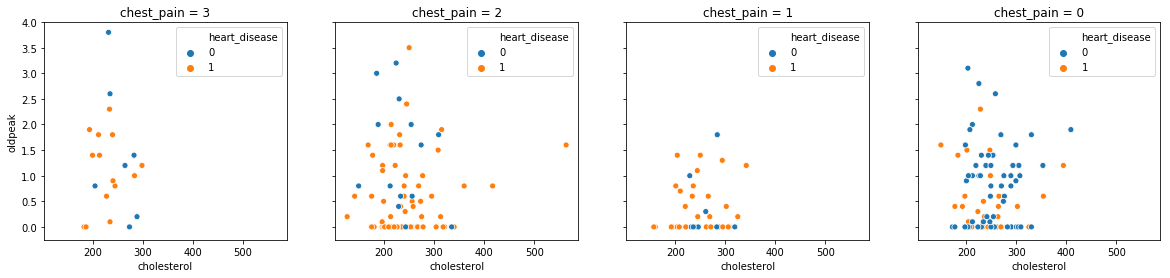

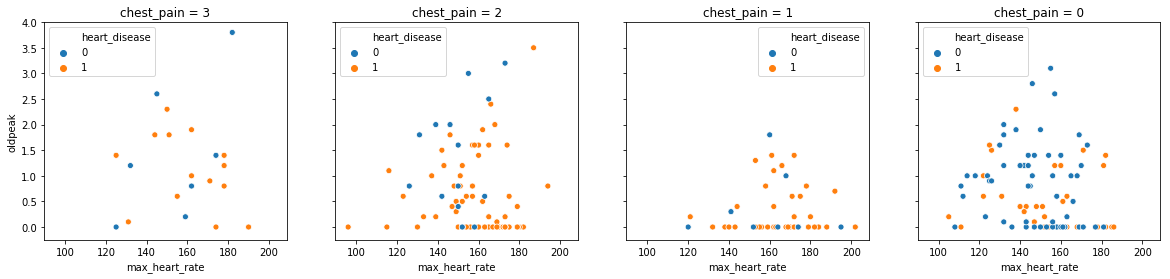

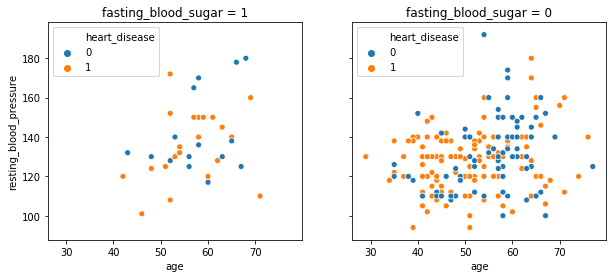

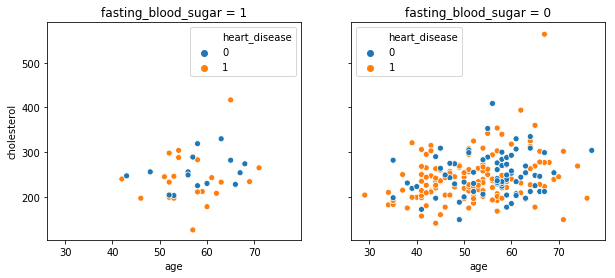

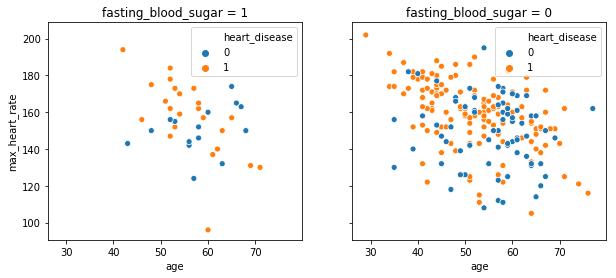

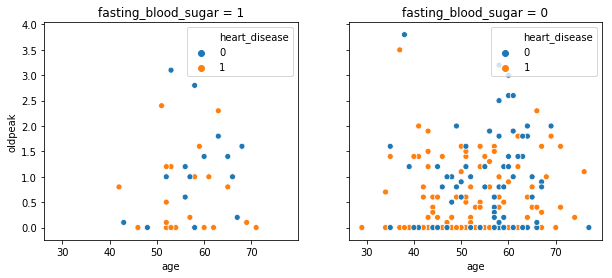

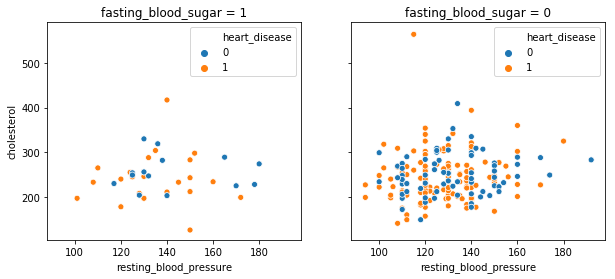

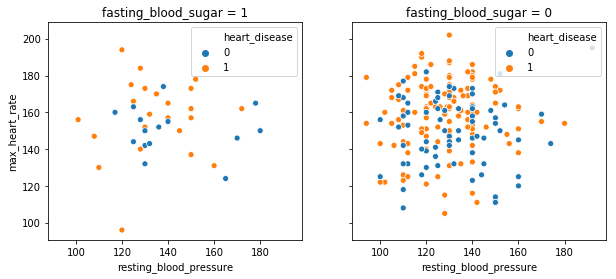

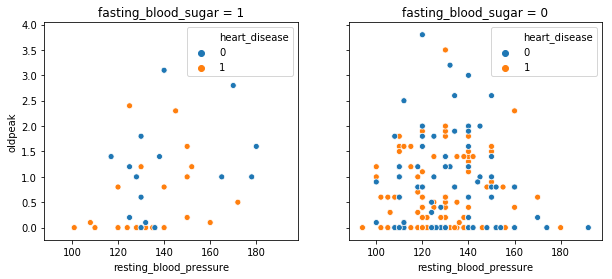

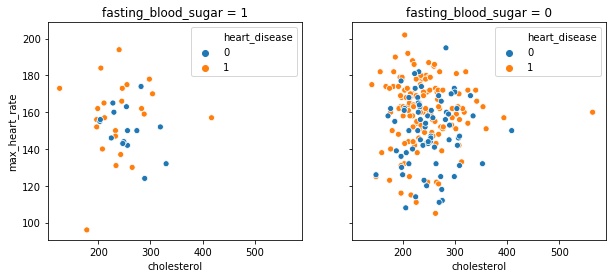

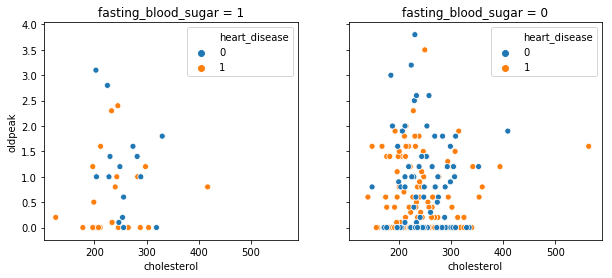

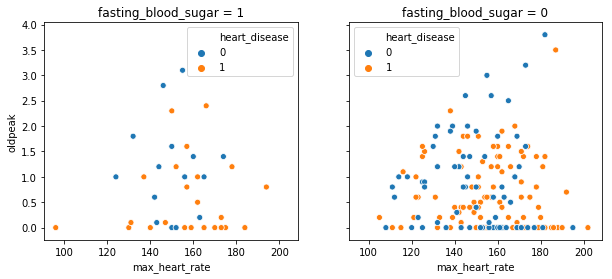

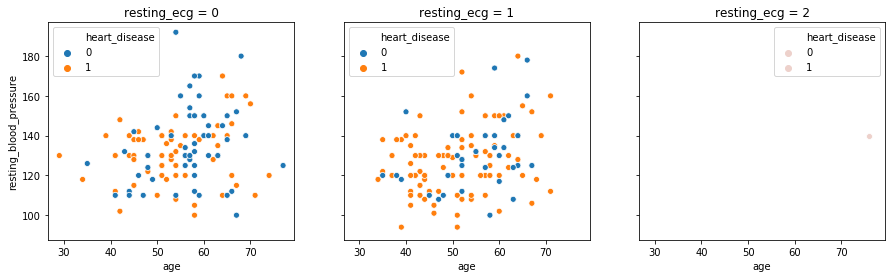

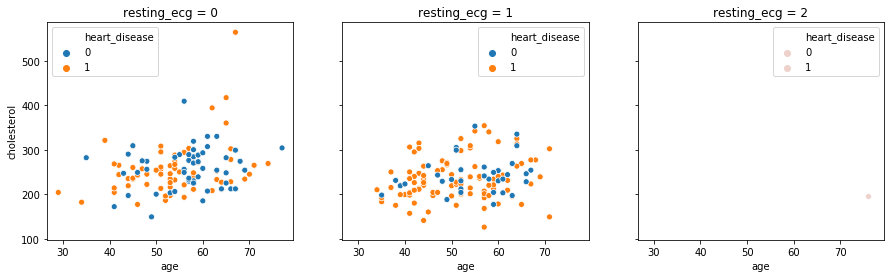

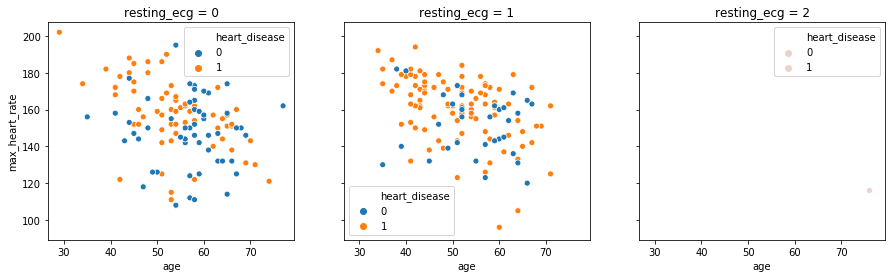

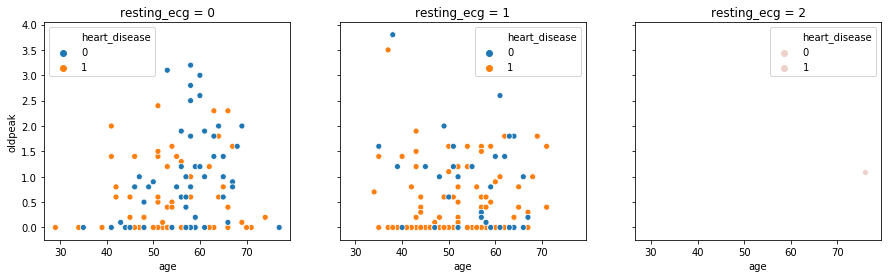

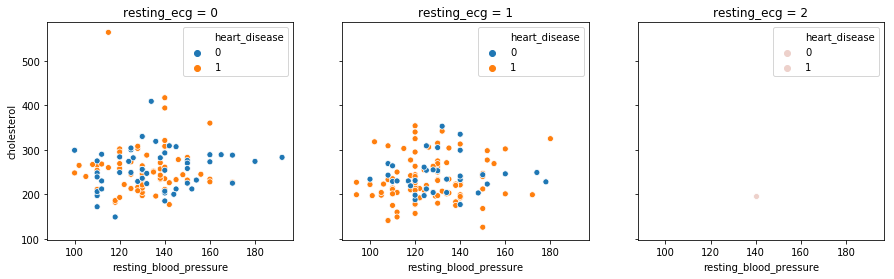

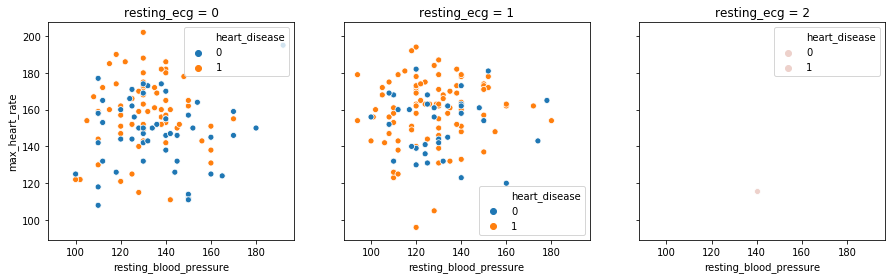

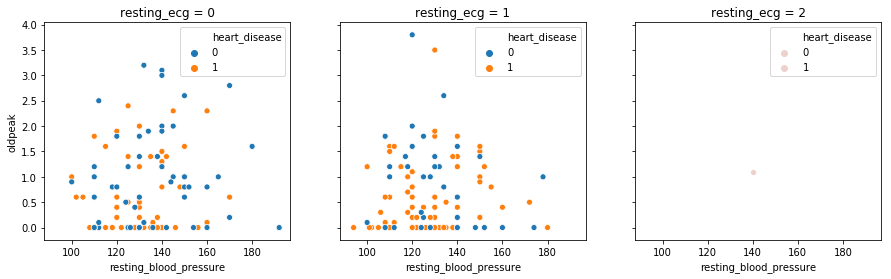

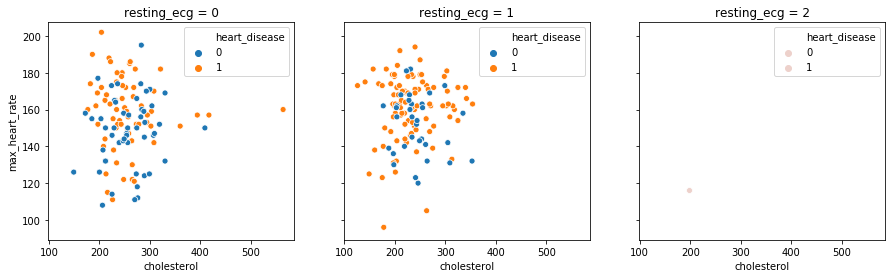

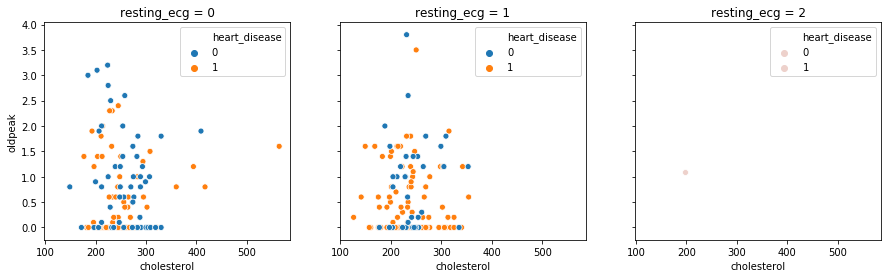

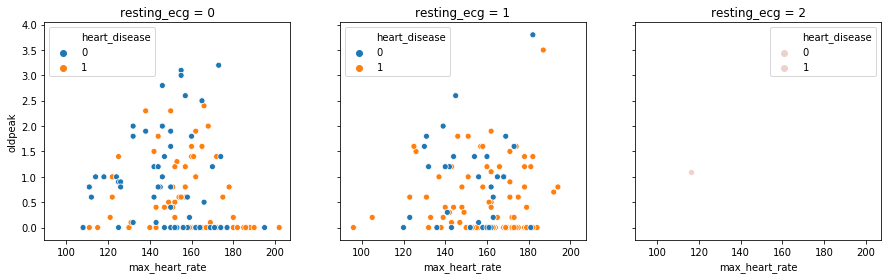

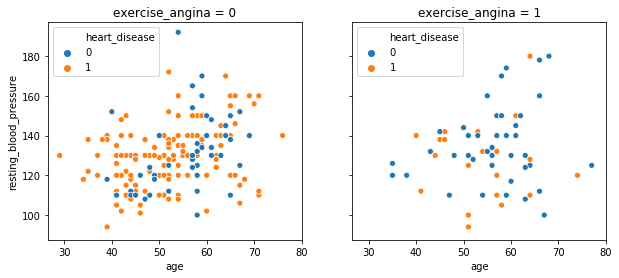

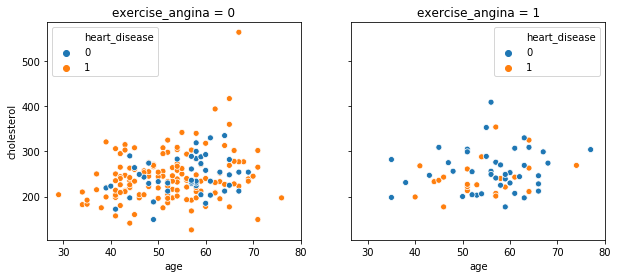

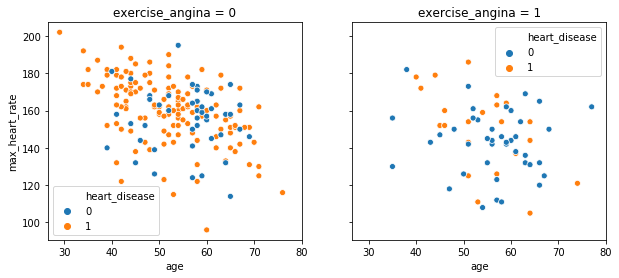

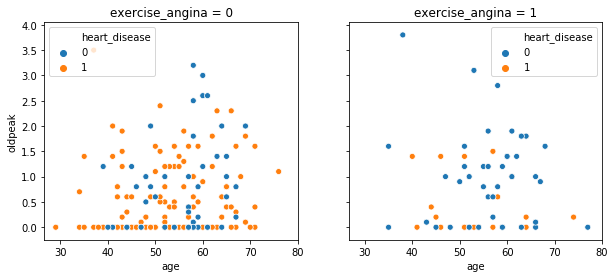

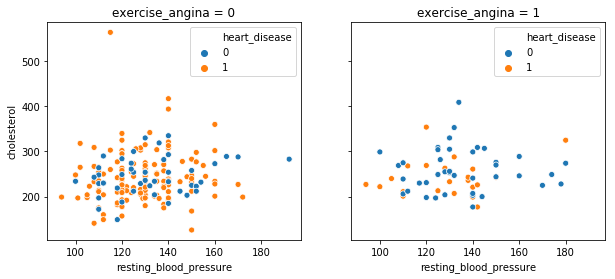

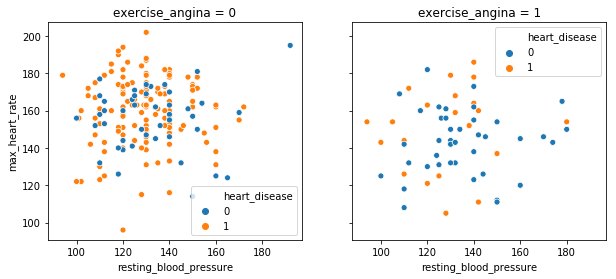

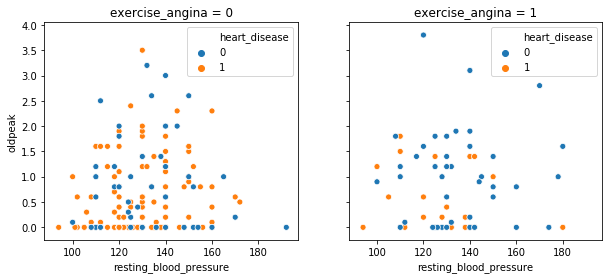

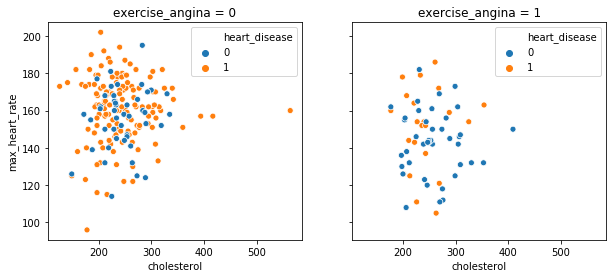

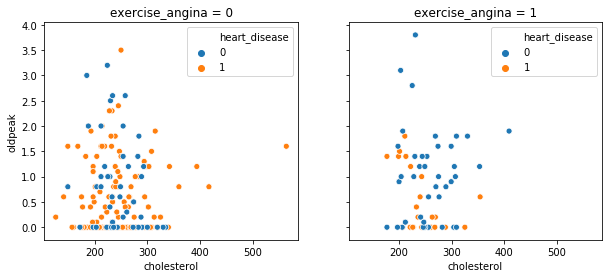

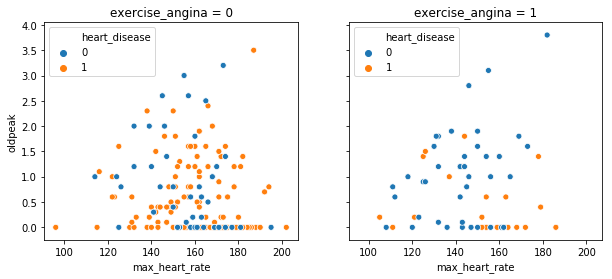

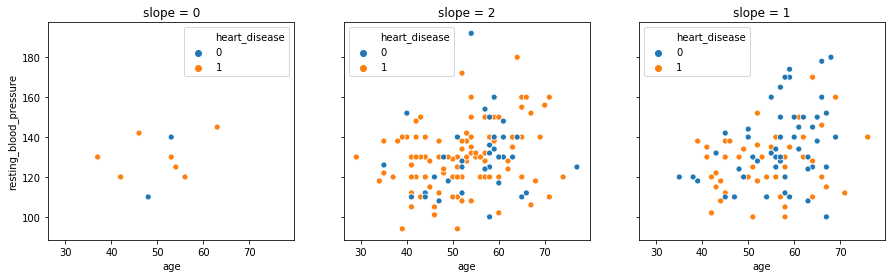

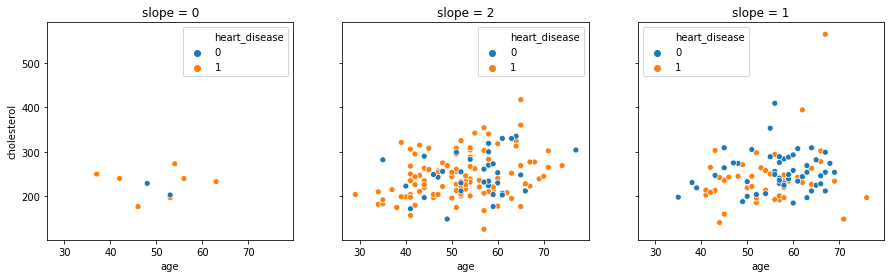

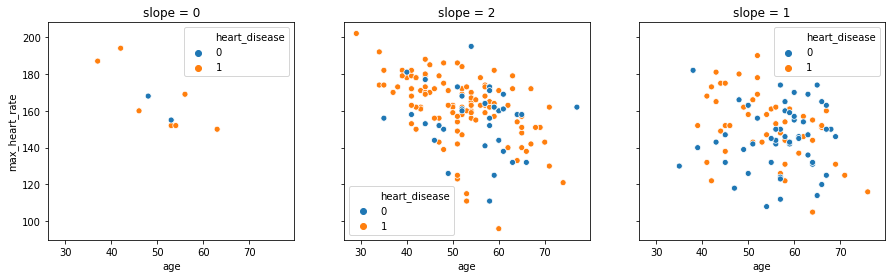

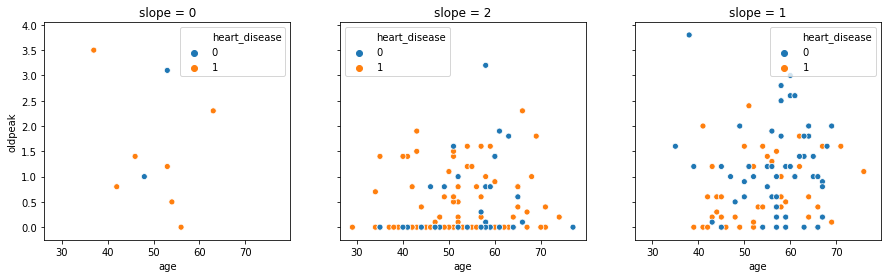

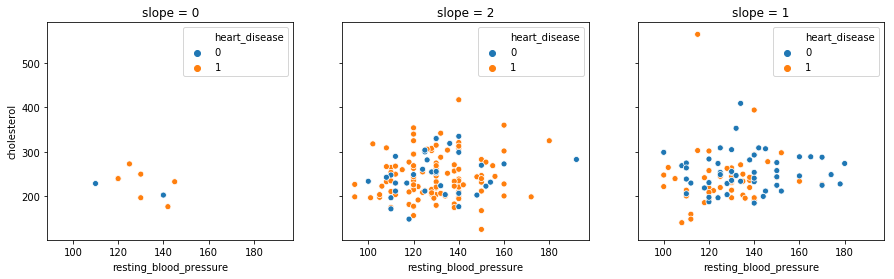

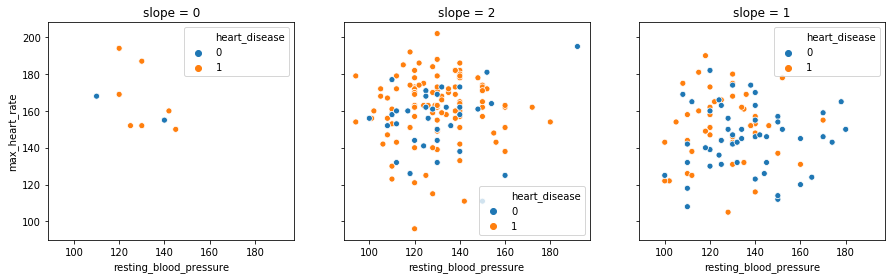

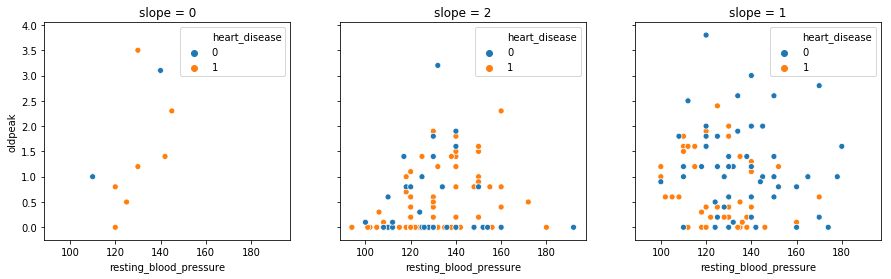

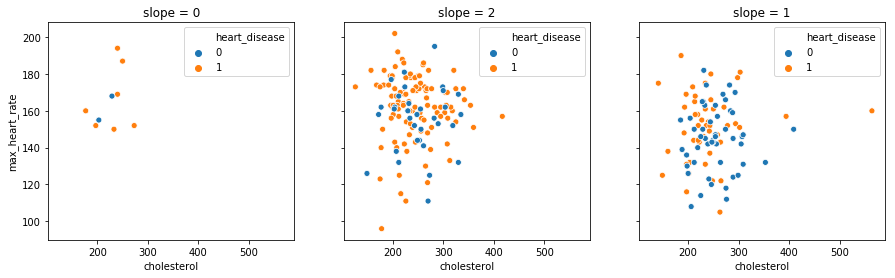

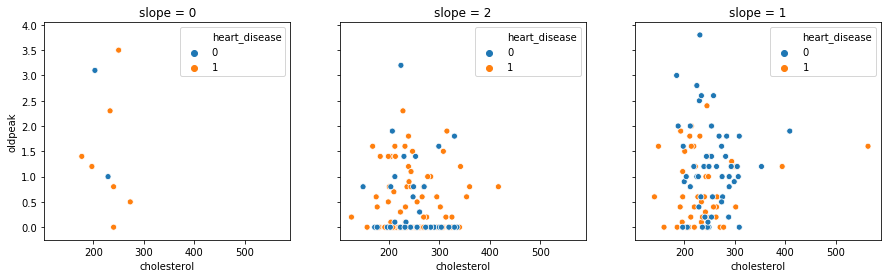

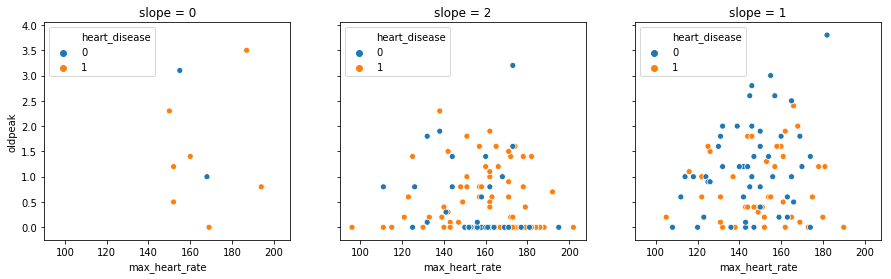

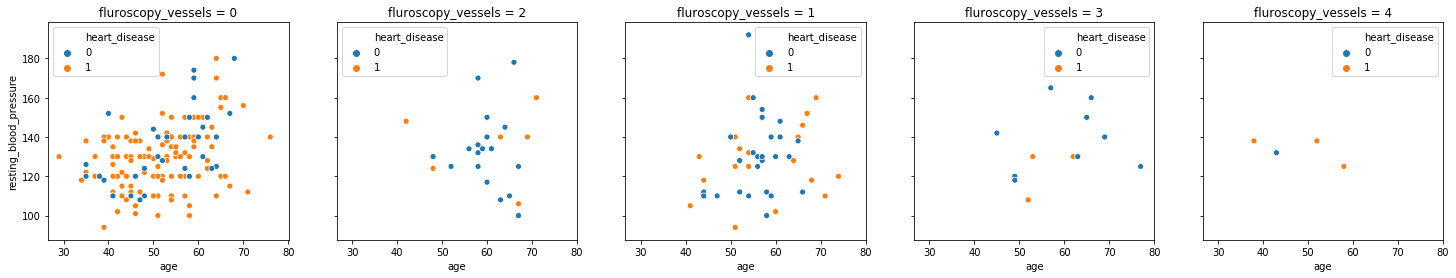

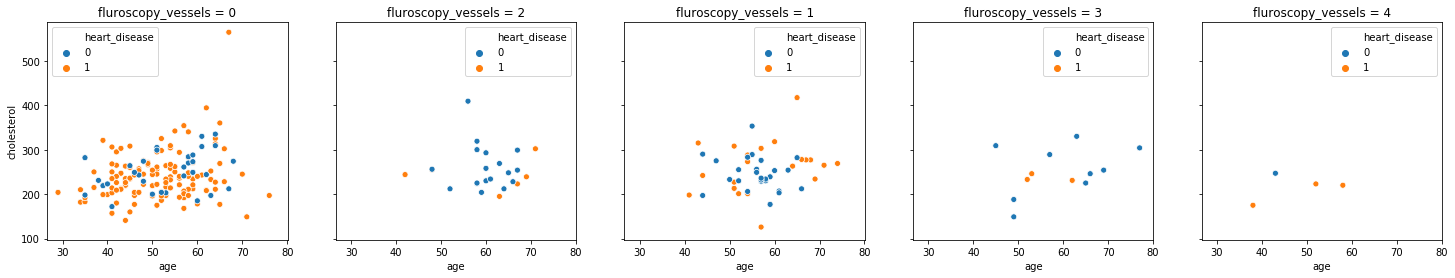

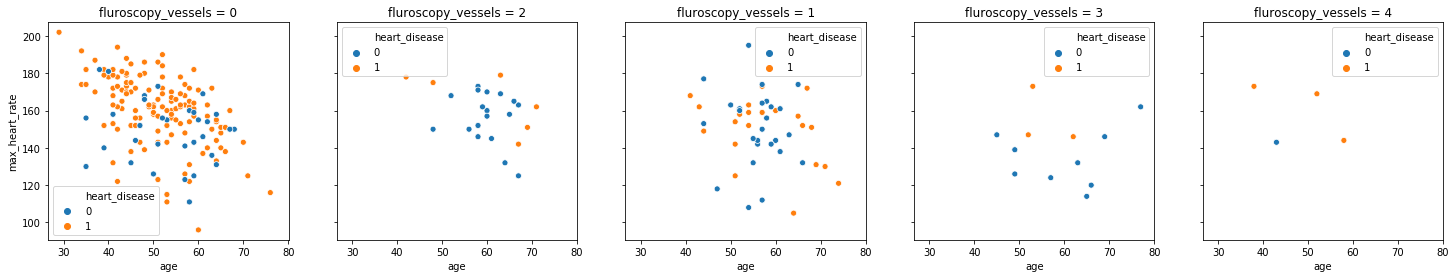

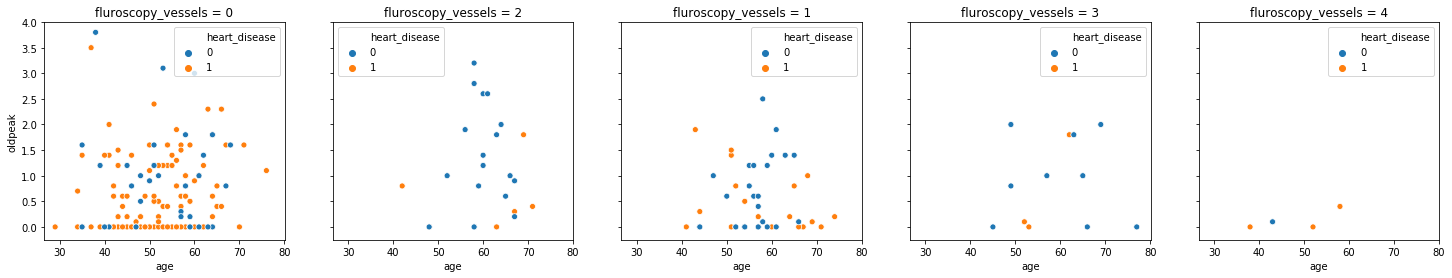

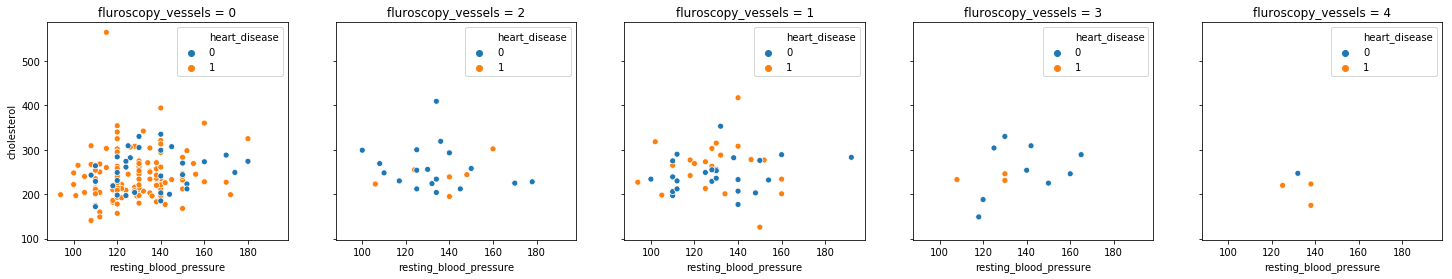

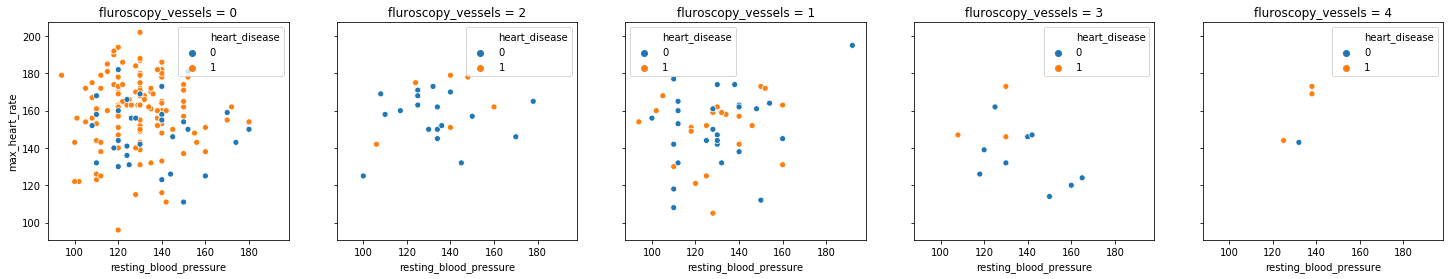

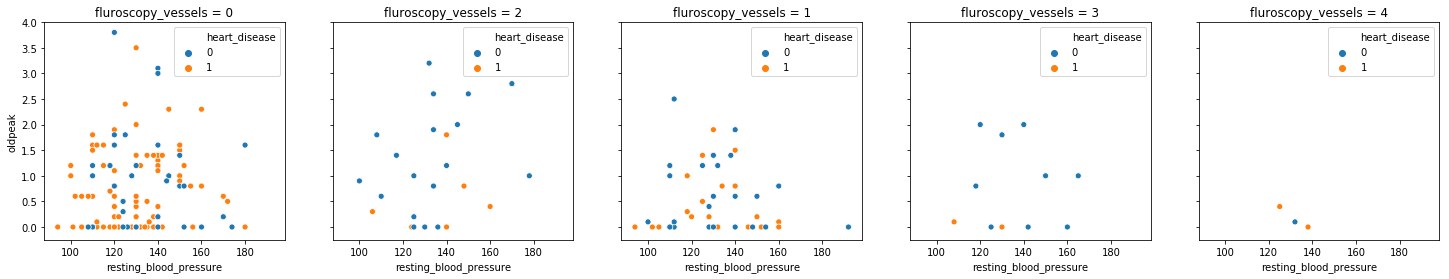

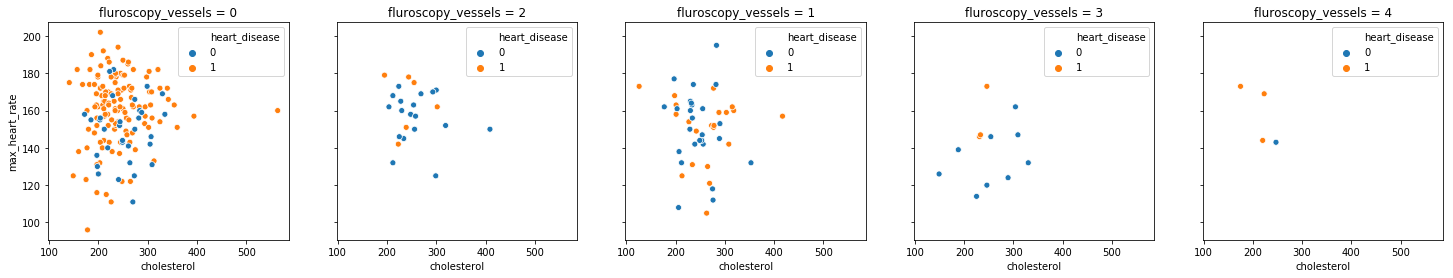

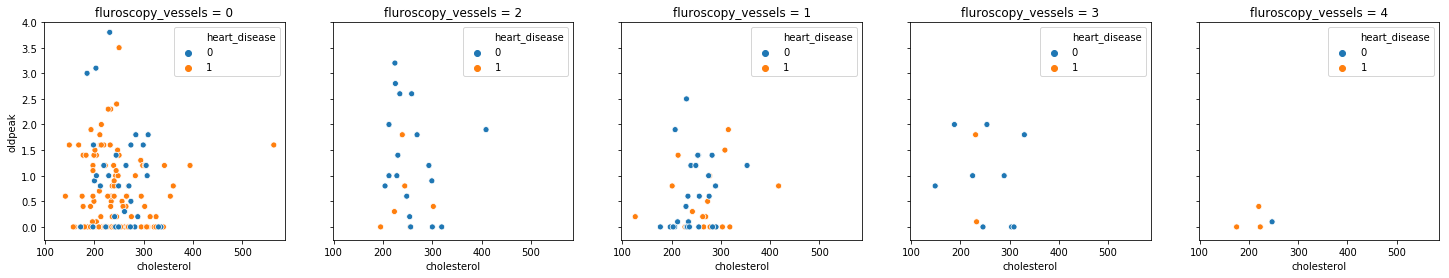

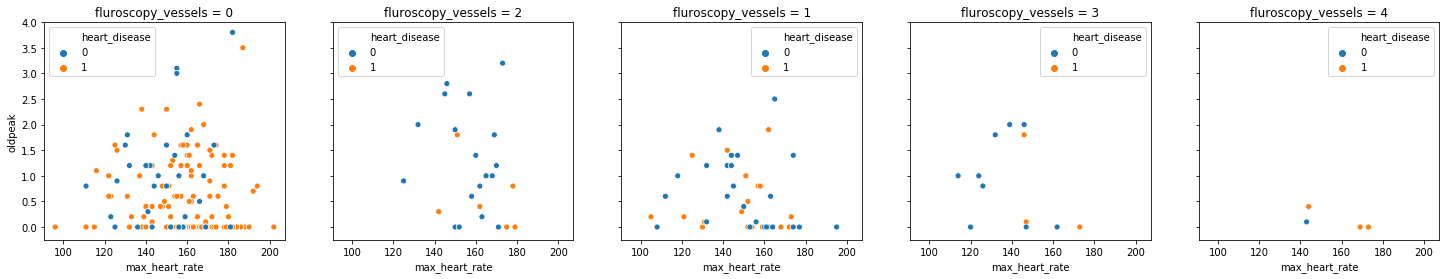

In [118]:
cat_without_hd = [col for col in categorical if col != 'heart_disease']

for col in cat_without_hd:
    col_values = predicted_hd[col].unique()
    col_len = len(col_values)
    for i, row in enumerate(numerical):
        for j, column in enumerate(numerical):
            if i < j:
                f, axes = plt.subplots(1, col_len, figsize=(col_len * 5, 4), sharex=True, sharey=True)
                for position, value in enumerate(col_values):
                    sns.scatterplot(x=row, y=column, hue='heart_disease', 
                                    data=predicted_hd[predicted_hd[col] == value], 
                                    ax=axes[position])
                    axes[position].set_title('{} = {}'.format(col, value))
                plt.show();

### Findings
Findings to come.

<a id='visual'></a>
## Questions & Visualizations

The questions you ask of a dataset change the visualizations you will/should use. Based on a similar process describe in this [Flowing Data article](https://flowingdata.com/2018/10/17/ask-the-question-visualize-the-answer/), I'll work through a number of different questions that can be asked of this dataset and what visualizations can be used to answer these questions.

### How many men and women are in the dataset?

The appropriate plot for this type of question is a bar chart to clearly distinguish the differences in values. Note that because we are differentiating between the sexes using different bars, we do not need to add further color to the plot.

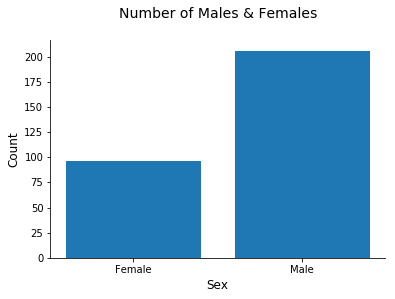

In [100]:
counts = df['sex'].value_counts()
positions = counts.index
plt.bar(positions, counts.values, tick_label=['Male', 'Female'])
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Males & Females\n', fontsize=14);
sns.despine()

**It is worth noting the following:**
- The plot is appropriately labeled with easy to understand title, axis labels and x-ticks
- X-tick labelling was done manually - this was done after originally using `counts.index` to confirm the original values
- Font sizes were changed to assist in readability; typically the title is largest, the axis labels next, and tick labels the smallest
- `\n` was used to create additional space between the title and the plot
- `sns.despine()` was used to remove the top and right borders

### What is the proportion of men and women?

This is the most question for using a pie chart. There are a number of reasons that those who spend a lot of time visualizing data prefer not to use pie charts. A few important reasons include that the plot doesn't include counts, that the human eye does not do a good job of using angles and curves to distinguish differences (when compared to length), and pie charts can be distorted when popping out segements or angling them.

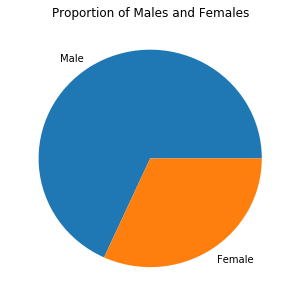

In [134]:
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=['Male', 'Female'])
plt.title('Proportion of Males and Females');

**Points of note:**
- It was necessary to change the figure size to square dimensions to not distort the plot
- Labels were added manually based on knowledge of the value counts

### What is the distribution of age for the participants?

Distributions can be plotted using a number of tools including histograms, boxplots, and swarmplots. What plot is most effective is influenced by the audience and what information should be highlighted with the plot.

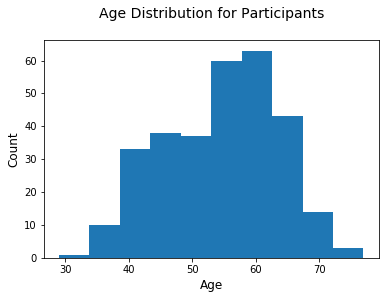

In [104]:
df.age.hist(grid=False)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution for Participants\n', fontsize=14);

A histogram gives a full picture of the distribution of the data, including the spread and the counts.

We can say that the age ranges from approximately 30 to 80, with the most common age around 55 to 65. The distribution is relatively normal, with a slight skew to the left.

**Some things to note:**
- This plot uses the built in pandas plotting that borrows from matplotlib - they have similar but still different functionality
- There are a few of these plots that can be created directly in pandas
- Using the pandas plots can often be helpful for faceting plots by a category

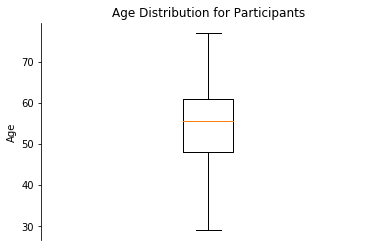

In [115]:
plt.boxplot(df['age'])
plt.xticks([])
plt.ylabel('Age')
plt.title('Age Distribution for Participants');
sns.despine(bottom=True)

A boxplot gives a summary of the spread of the data by showing the range of the data and the 25th, 50th and 75th percentile break points. It doesn't give information about the counts associated with the spread.

We can also describe the age range, and say that the median age is around 55, with 25% of participants 48 or younger , and 75% of participants 60 or younger. Discussions about skew are still possible with a box plot, though less apparent.

**Points of note:**
- The tick label is removed by using an empty list with `plt.xticks()`
- `sns.despine()` has a number of arguments to control what is despined
- There are many formatting options that are associated with the box plot but they can take some effort to adjust

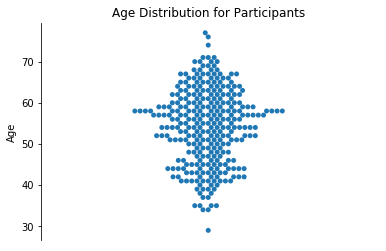

In [119]:
sns.swarmplot(y='age', data=df)
plt.xticks([])
plt.ylabel('Age')
plt.title('Age Distribution for Participants');
sns.despine(bottom=True)

A swarm plot will attempt to plot each of the points at each point along the age spread. As a result, the broader the shape, the more people have that age. (With the lines sometimes moving up to limit the space required)

We can talk about the range of the data and discuss that there are more people between the ages of 50 and 60, with another group between the ages of around 40 to 45. 

**Point of note:**
- The arguments required for seaborn are quite different than those that are used for `matplotlib.pyplot`

The two can be combined for some more detail.

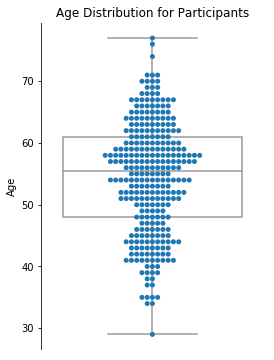

In [131]:
plt.figure(figsize=(4, 6))
sns.swarmplot(y='age', data=df)
sns.boxplot(y=df['age'], color='white')
plt.xticks([])
plt.ylabel('Age')
plt.title('Age Distribution for Participants');
sns.despine(bottom=True)

**Note:** The seaborn version of the boxplot must be used to combine these two plots. 

### Is there a difference in the distribution of ages for males and females?

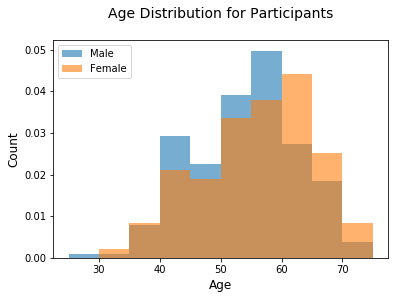

In [146]:
bins = np.arange(25, 80, 5)
df[df['sex'] == 1].age.hist(grid=False, alpha=0.6, bins=bins, label='Male', density=True)
df[df['sex'] == 0].age.hist(grid=False, alpha=0.6, bins=bins, label='Female', density=True)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution for Participants\n', fontsize=14)
plt.legend();

**There were a number of steps that were necessary to produce this exact plot:**
- Color was added because this is necessary to indicate a difference in categories
- A legend is therefore necessary to explain the meaning of the colors
- `alpha` is an argument that can be used to change transparency - the decimal represents that percentage of the "full color/point"
- Because of the different counts for males and females, it was necessary to specify bins (the breaks for categorizing the ages) - the easiest way to do this is with `np.arange(start, stop, jump)`
- Because of the different counts for males and females, it was also helpful to include the `density` argument to have the distributions as a propportion of the whole

This is what the plot would look like without those adjustments - the similarities are identifiable but less precise. (What adjustments you make really depends on the message you want to communicate with the plot)

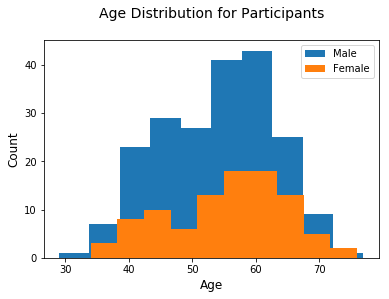

In [147]:
df[df['sex'] == 1].age.hist(grid=False, label='Male')
df[df['sex'] == 0].age.hist(grid=False, label='Female')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution for Participants\n', fontsize=14)
plt.legend();

For example with the first plot, it is easier to say that, on average the female population is slightly older than the male population, but that the general distributions are quite similar. (Which effectively answers the questions that was asked)

The plot above does a better job of showing the exact counts of the age ranges though it would be preferrable to specify the bins so that the age categories are the same.

**Point of note:**
- Notice that matplotlib will attempt to place the legend in the most appropriate place automatically, this can also be specified

### Is there a difference in the rate of heart disease for males and females?

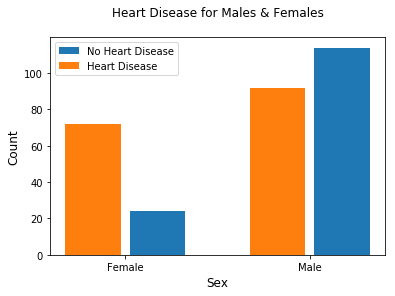

In [150]:
# Get counts
has_hd = df.heart_disease == 1
hd_counts = df['sex'][has_hd].value_counts().sort_index()
nohd_counts = df['sex'][~has_hd].value_counts().sort_index()

# Get plot positions from number of unique values
positions = np.array([0, 1])

plt.bar(positions + 0.35, nohd_counts, width=0.3, label='No Heart Disease')
plt.bar(positions, hd_counts, width=0.3, label='Heart Disease')
plt.xticks(positions + 0.35/2, ['Female', 'Male']) 
plt.legend()
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Heart Disease for Males & Females\n');

With this plot we are focusing on the counts associated with each sex. We can say that there are about three times as many females that have heart disease as females that don't have heart disease and that the numbers of males that do and do not have heart disease are relatively similar.

The one thing that is harder to talk about is rates or proportions of heart disease for each sex because the numbers in each are different.

**There are a number of steps that are worth noting to create this chart:**
- These plots are easiest to produce when value counts are created by filtering by another value - in this case, a boolean seires for "has heart disease" was created and used to filter for only the values in the sex column that matched
- The `~` character is used as a `NOT` value, reversing the results that are found in the original series
- The variables names are chosen to help track what is being plotted
- Positions must be specified for each plot and offset - by using an array, a value can be added to the original array to produce an offset
- It's also helpful to specify the width to assist in tick positioning
- Tick positions are the average of the two bar positions

It is easier to talk about rates/proportions between categories if divide by the total count.

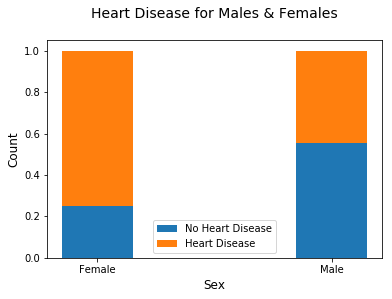

In [156]:
# Get proportions
is_male = df.sex == 1
male_counts = df['heart_disease'][is_male].value_counts().sort_index()
female_counts = df['heart_disease'][~is_male].value_counts().sort_index()
male_props = male_counts/male_counts.sum()
female_props = female_counts/female_counts.sum()

# Get plot positions from number of unique values
positions = np.array([0, 1])

plt.bar(positions, [female_props[0], male_props[0]], width=0.3, label='No Heart Disease')
plt.bar(positions, [female_props[1], male_props[1]], width=0.3, label='Heart Disease', 
        bottom=[female_props[0], male_props[0]])
plt.xticks(positions, ['Female', 'Male']) 
plt.legend()
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Heart Disease for Males & Females\n', fontsize=14);

With this chart it becomes much clearer that approximately 75% of females had heart disease but only around 1/3 of males had heart disease.

**Points of note to produce the stacked bar chart:**
- The key element is to include the `bottom` argument in your second bar plot and reference the previous values
- The grouping here was rearranged to allow the values to be divided by the gender counts
- This meant that some re-ordering was required for the values for the plots

### How do cholesterol levels change with age?

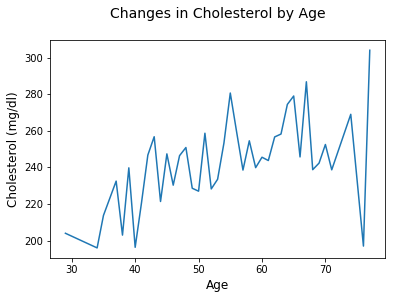

In [198]:
sns.lineplot(x='age', y='cholesterol', data=df, ci=None)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Changes in Cholesterol by Age\n', fontsize=14);

Line charts are used to show changes over (usually) time.

This is less preferrable when all measurements are at the same time. 

**Note:**
- When reporting a value like "cholesterol" it is helpful to be specific about units in your axis label

If this was done with matplotlib it would be necessary to group by age and find the means to get the necessary values.

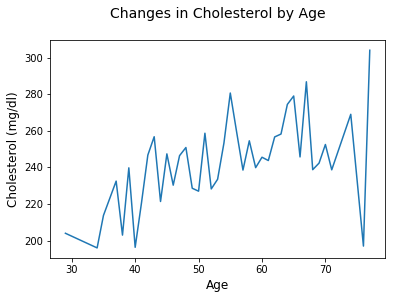

In [204]:
average_cholesterol = df.groupby('age')['cholesterol'].mean()
plt.plot(average_cholesterol.index, average_cholesterol)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Changes in Cholesterol by Age\n', fontsize=14);

The plot above can be harder to use for generalizations. We can use "binning" (grouping results together) to make more generalizations.

In [163]:
df['decade'] = np.where(df['age']>=70, 
                        70, 
                        np.where((df['age']>=60) & (df['age']<70),
                                 60,
                                 np.where((df['age']>=50) & (df['age']<60), 
                                          50, 
                                          np.where((df['age']>=40) & (df['age']<50), 
                                                   40, 
                                                   np.where((df['age']>=30) & (df['age']<40), 
                                                            30, 
                                                            np.nan)))))

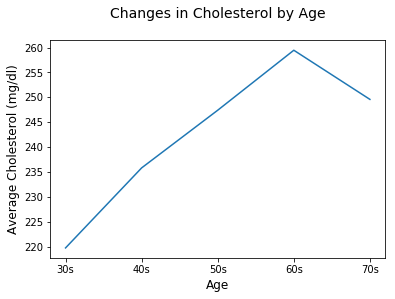

In [202]:
sns.lineplot(x='decade', y='cholesterol', data=df, ci=None)
plt.xticks(np.sort(df.decade.unique()), ['30s', '40s', '50s', '60s', '70s'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Cholesterol (mg/dl)', fontsize=12)
plt.title('Changes in Cholesterol by Age\n', fontsize=14);

This plot makes it much easier to discuss the changes over time but loses a lot of the detail (A better interval may have been every five years). We can say that the trend is that as age increases, the levels of blood cholesterol also tend to increase. 

Some things were done to make interpretation clearer:
- The x-ticks were change to indicate a spread of ages rather than an exact age
- The y-axis label was also changed to help promote this understanding

One issue with this chart is that it does not capture the number of values that were used to create this information, as a result, we have less understanding of how reliable this information is. We can add to this by including a confidence interval.

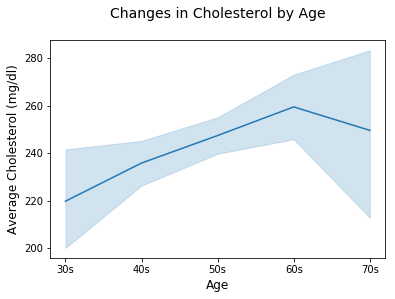

In [203]:
sns.lineplot(x='decade', y='cholesterol', data=df)
plt.xticks(np.sort(df.decade.unique()), ['30s', '40s', '50s', '60s', '70s'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Cholesterol (mg/dl)', fontsize=12)
plt.title('Changes in Cholesterol by Age\n', fontsize=14);

**Note:** While not exact, the widening of the confidence interval suggests that less values were used to calculate the means.

### Is there a difference by sex in how cholesterol levels change over time?

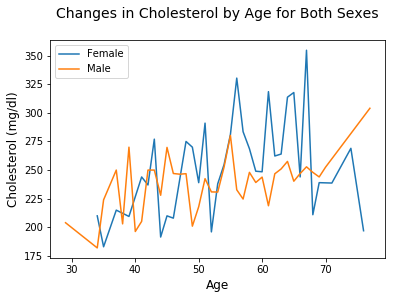

In [206]:
sns.lineplot(x='age', y='cholesterol', hue='sex', data=df, ci=None)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Changes in Cholesterol by Age for Both Sexes\n', fontsize=14)
plt.legend(['Female', 'Male']);

We can say, based on this data, that both tend to have increase blood cholesterol levels with increases in age but at a slower rate for females than males. (We could also add confidence intervals to this data)

**Point of note:**
- The values for the legend were changed to improve interpretation

If we produced the same plot in matplotlib we would need to filter by gender first and then plot.

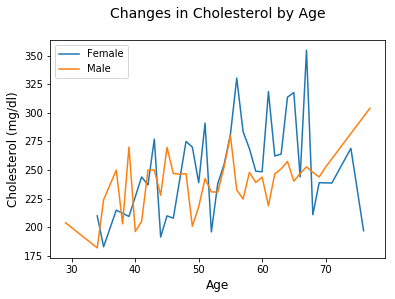

In [210]:
avg_cholesterol_male = df[df.sex == 1].groupby('age')['cholesterol'].mean()
avg_cholesterol_female = df[df.sex == 0].groupby('age')['cholesterol'].mean()

plt.plot(avg_cholesterol_female.index, avg_cholesterol_female, label='Female')
plt.plot(avg_cholesterol_male.index, avg_cholesterol_male, label='Male')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Changes in Cholesterol by Age\n', fontsize=14)
plt.legend();

**Note:** The order of the plots determines their default color so plots were made in an order that was consistent with other coloring.

### What is the relationship between cholesterol and age?

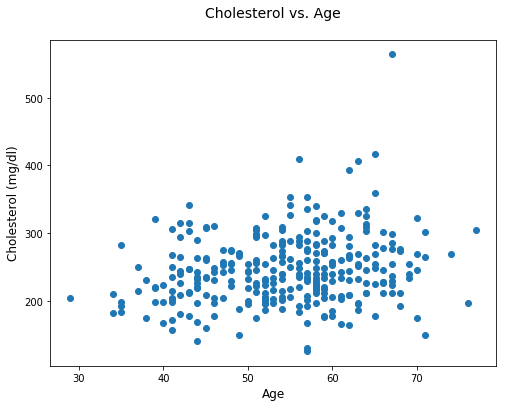

In [211]:
plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['cholesterol'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Cholesterol vs. Age\n', fontsize=14);

When we have two variables that are numerical, scatterplots are often appropriate to describe how these two features vary in relation to each other. (Reminder: correlation does not prove causation!)

Looking at this information we could say that there is a weak, slightly positive relationship between age and cholesterol. The `weak` description comes from the spread of the dots at each age, and the `slightly positive` comes from the fact that there does seem to be an increase in cholesteral levels as age increaes. 

As we can see, this gives a MUCH different perspective on the relationship between age and cholesterol than was seen in the line plot. 

**Notes:**
- Axis labels are especially important for scatterplots, otherwise it can be difficult to determine which axis relates to which variable
- Using `vs.` in the title is a common method of titling scatter plots

If you want to quickly fit a line of regression through the points, `sns.regplot()` can be used.

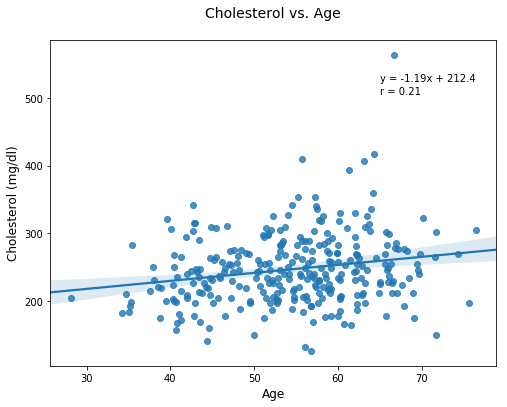

In [228]:
plt.figure(figsize=(8,6))
p = sns.regplot('age', 'cholesterol', data=df, x_jitter=1)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Cholesterol vs. Age\n', fontsize=14);
x_data = p.get_lines()[0].get_xdata()
y_data = p.get_lines()[0].get_ydata()
m = round((y_data[1] - y_data[0])/(x_data[0] - x_data[1]), 2)
c = round(y_data[0], 2)
r = round(df[['age', 'cholesterol']].corr().iloc[0,1], 2)
plt.text(65, 525, 'y = {}x + {}'.format(m, c))
plt.text(65, 505, 'r = {}'.format(r));

The plotted regression line allows us to more clearly see the slightly positive relationship between the data. 

**Points of note:** 
- The equation for the regression line (and correlation) must be calculated manually and text added using `plt.text()`
- "Jitter" was added to this plot using the `x_jitter`argument to give a sense of more "continuous" data

### Is there a difference in the relationship between age and cholesterol for both sexes?

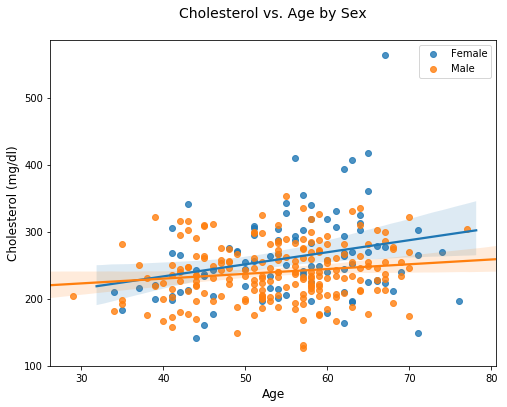

In [238]:
plt.figure(figsize=(8,6))
sns.regplot('age', 'cholesterol', data=df[df.sex == 0], label='Female')
sns.regplot('age', 'cholesterol', data=df[df.sex == 1], label='Male')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Cholesterol vs. Age by Sex\n', fontsize=14)
plt.legend();

With the above we can say that there tends to be more of an increase in cholesterol levels as age increases for males compared to females. (This matches our findings when plotting the line charts)

With this we can see that one of the potential reasons for the different relationships observed between gender is due to a male outlier with over 500 mg/dL for cholesterol at around 65. If this outlier was removed, the relationship between age and cholesterol might be very similar for both genders.(The confidence interval overlaps also suggest that the differences in these slopes are not statistically different)

**Points of note:**
- The two plots were created by plotting two of the same plot, as is done with matplotlib
- The plots were labeled to assist with the creation of a legend